We will use those libraries in this tutorial:

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot
import matplotlib.pylab as plt

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [2]:
df_train=pd.read_csv('data/train.csv',header=0,index_col=0,parse_dates=['date'])
df_oil = pd.read_csv('data/oil.csv',header=0,parse_dates=['date'])
df_stores = pd.read_csv('data/stores.csv',header=0,index_col=0)
df_transactions = pd.read_csv('data/transactions.csv',header=0,parse_dates=['date'])
df_holidays = pd.read_csv('data/holidays_events.csv',header=0,parse_dates=['date'])

In [3]:
df_train.tail(10)

date  store_nbr                      family     sales  \
id                                                                    
3000878 2017-08-15          9                   MAGAZINES    11.000   
3000879 2017-08-15          9                       MEATS   449.228   
3000880 2017-08-15          9               PERSONAL CARE   522.000   
3000881 2017-08-15          9                PET SUPPLIES     6.000   
3000882 2017-08-15          9     PLAYERS AND ELECTRONICS     6.000   
3000883 2017-08-15          9                     POULTRY   438.133   
3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
id                    
3000878            0  
3000879            0  
3000880           11  
3000881            0  
3000882            0  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0

In [4]:
df_oil.head(10)

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20
5 2013-01-08       93.21
6 2013-01-09       93.08
7 2013-01-10       93.81
8 2013-01-11       93.60
9 2013-01-14       94.27

As you can see, we have 43 missing values in oil dataset.

In [5]:
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [6]:
df_oil.iloc[0,1]=df_oil.iloc[1,1]
df_oil.fillna(method='ffill', inplace=True)
df_oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

Now, let's merge all the dataframes.

In [7]:
df_train = df_train.merge(df_oil, on='date', how='left')
df_train = df_train.merge(df_stores, on='store_nbr', how='left')
df_train = df_train.merge(df_transactions, on=['date','store_nbr'], how='left')
df_train = df_train.merge(df_holidays, on='date', how='left')

In [8]:
df_train

date  store_nbr                      family     sales  \
0       2013-01-01          1                  AUTOMOTIVE     0.000   
1       2013-01-01          1                   BABY CARE     0.000   
2       2013-01-01          1                      BEAUTY     0.000   
3       2013-01-01          1                   BEVERAGES     0.000   
4       2013-01-01          1                       BOOKS     0.000   
...            ...        ...                         ...       ...   
3054343 2017-08-15          9                     POULTRY   438.133   
3054344 2017-08-15          9              PREPARED FOODS   154.553   
3054345 2017-08-15          9                     PRODUCE  2419.729   
3054346 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3054347 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  dcoilwtico   city      state type_x  cluster  \
0                  0       93.14  Quito  Pichincha      D       13   
1                  0       93.14  Quito  Pichincha      D       13   
2                  0       93.14  Quito  Pichincha      D       13   
3                  0       93.14  Quito  Pichincha      D       13   
4                  0       93.14  Quito  Pichincha      D       13   
...              ...         ...    ...        ...    ...      ...   
3054343            0       47.57  Quito  Pichincha      B        6   
3054344            1       47.57  Quito  Pichincha      B        6   
3054345          148       47.57  Quito  Pichincha      B        6   
3054346            8       47.57  Quito  Pichincha      B        6   
3054347            0       47.57  Quito  Pichincha      B        6   

         transactions   type_y    locale locale_name            description  \
0                 NaN  Holiday  National     Ecuador     Primer dia del ano   
1                 NaN  Holiday  National     Ecuador     Primer dia del ano   
2                 NaN  Holiday  National     Ecuador     Primer dia del ano   
3                 NaN  Holiday  National     Ecuador     Primer dia del ano   
4                 NaN  Holiday  National     Ecuador     Primer dia del ano   
...               ...      ...       ...         ...                    ...   
3054343        2155.0  Holiday     Local    Riobamba  Fundacion de Riobamba   
3054344        2155.0  Holiday     Local    Riobamba  Fundacion de Riobamba   
3054345        2155.0  Holiday     Local    Riobamba  Fundacion de Riobamba   
3054346        2155.0  Holiday     Local    Riobamba  Fundacion de Riobamba   
3054347        2155.0  Holiday     Local    Riobamba  Fundacion de Riobamba   

        transferred  
0             False  
1             False  
2             False  
3             False  
4             False  
...             ...  
3054343       False  
3054344       False  
3054345       False  
3054346       False  
3054347       False  

[3054348 rows x 16 columns]

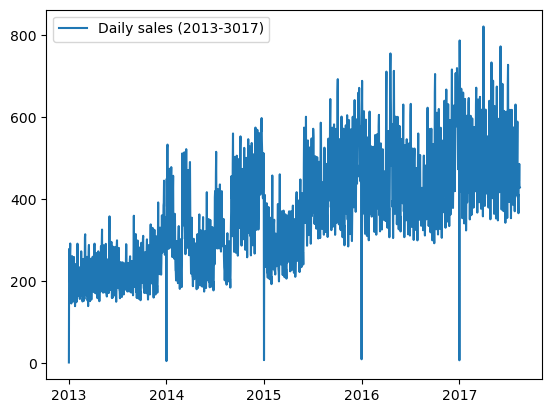

In [9]:
df_plot=df_train[["date","sales"]].groupby(by='date',as_index=False).mean()
pyplot.plot(df_plot['date'],df_plot['sales'],label='Daily sales (2013-3017)')
pyplot.legend()
pyplot.show()

Text(0, 0.5, 'Daily sales')

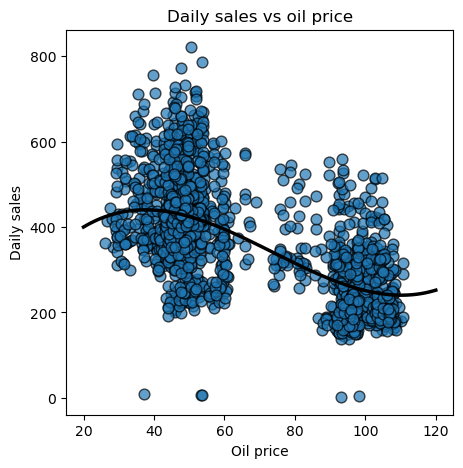

In [10]:
df_plot = df_train[["date","dcoilwtico","sales"]].groupby(by='date').mean()
df_plot.fillna(method='ffill',inplace=True)


# Initialize layout
fig, ax = pyplot.subplots(figsize = (5, 5))

# Add scatterplot
ax.scatter(df_plot['dcoilwtico'], df_plot['sales'], label='Daily sales vs oil price',
           s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
b3, b2, b1, a = np.polyfit(df_plot['dcoilwtico'], df_plot['sales'], deg=3)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(20, 120, num=100)

# Plot regression line
ax.plot(xseq, a + b1 * xseq + b2 * xseq * xseq + b3 * xseq * xseq * xseq, color="k", lw=2.5)
ax.title.set_text('Daily sales vs oil price')
ax.set_xlabel('Oil price')
ax.set_ylabel('Daily sales')

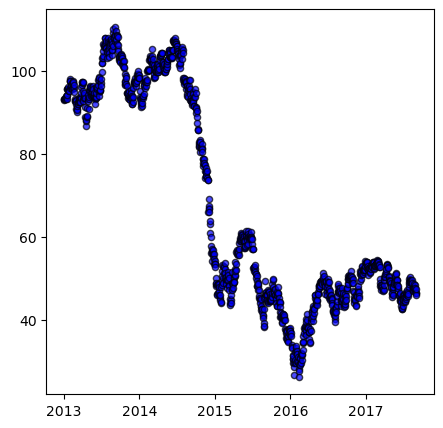

In [11]:
df_oil.tail(10)
fig, ax = pyplot.subplots(figsize= (5, 5))
ax.scatter(df_oil.date,df_oil.dcoilwtico,s=20,alpha=0.7,edgecolors="k",color='blue')

#### Influence of promotions

Text(0, 0.5, 'Daily sales')

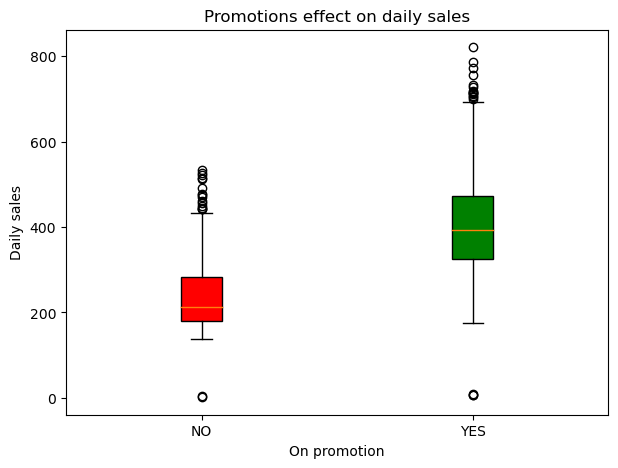

In [12]:
df_plot=df_train[["date","sales","onpromotion"]].groupby(by='date').mean()
data_1=df_plot[df_plot.onpromotion == 0]['sales']
data_2=df_plot[df_plot.onpromotion > 0]['sales']

fig, ax = pyplot.subplots(figsize=(7, 5))
dataset = [data_1, data_2]
labels = ['NO','YES']
colors = ['red','green']
bplot = ax.boxplot(dataset, labels = labels, patch_artist = True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title("Promotions effect on daily sales")
ax.set_xlabel("On promotion")
ax.set_ylabel("Daily sales")

#### Influence of national holidays on the average daily sales

Text(0, 0.5, 'Daily sales')

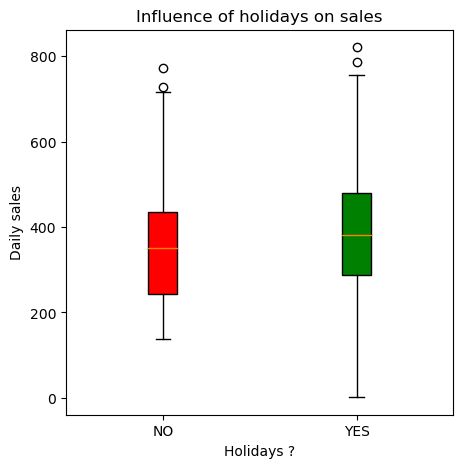

In [13]:
df_plot=df_train.merge(df_holidays,on='date',how='left')
data_1=df_plot[df_plot.type.isnull()][['date','sales']].groupby(by='date').mean()['sales']
data_2=df_plot[df_plot.type.notnull()][['date','sales']].groupby(by='date').mean()['sales']

fig, ax= pyplot.subplots(figsize=(5,5))
dataset=[data_1,data_2]
labels=['NO','YES']
colors=['red','green']
bplot=ax.boxplot(dataset,labels=labels,patch_artist=True)
for patch, color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
ax.title.set_text('Influence of holidays on sales')
ax.set_xlabel("Holidays ?")
ax.set_ylabel("Daily sales")

In [14]:
data_complet = df_train[(df_train.family=='BEVERAGES') & (df_train.store_nbr==51)][['date','sales']]
data_complet = data_complet[data_complet.duplicated('sales')==False]
data_complet = data_complet.set_index('date',drop=True)
print(data_complet.tail(10))

             sales
date              
2017-08-04  4522.0
2017-08-05  6134.0
2017-08-07  3779.0
2017-08-08  3269.0
2017-08-09  4267.0
2017-08-11  5356.0
2017-08-12  4137.0
2017-08-13  5529.0
2017-08-14  3888.0
2017-08-15  3860.0


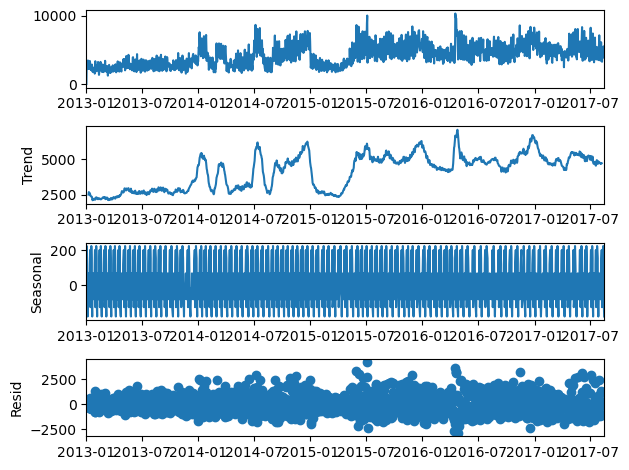

In [15]:
#from plotly.plotly import plot_mpl
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=data_complet,
                            model='additive',
                            period=15)
fig = result.plot()
plt.rcParams['figure.figsize'] = [15,7]

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(15).mean()
    rolstd = timeseries.rolling(15).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Stationarity test

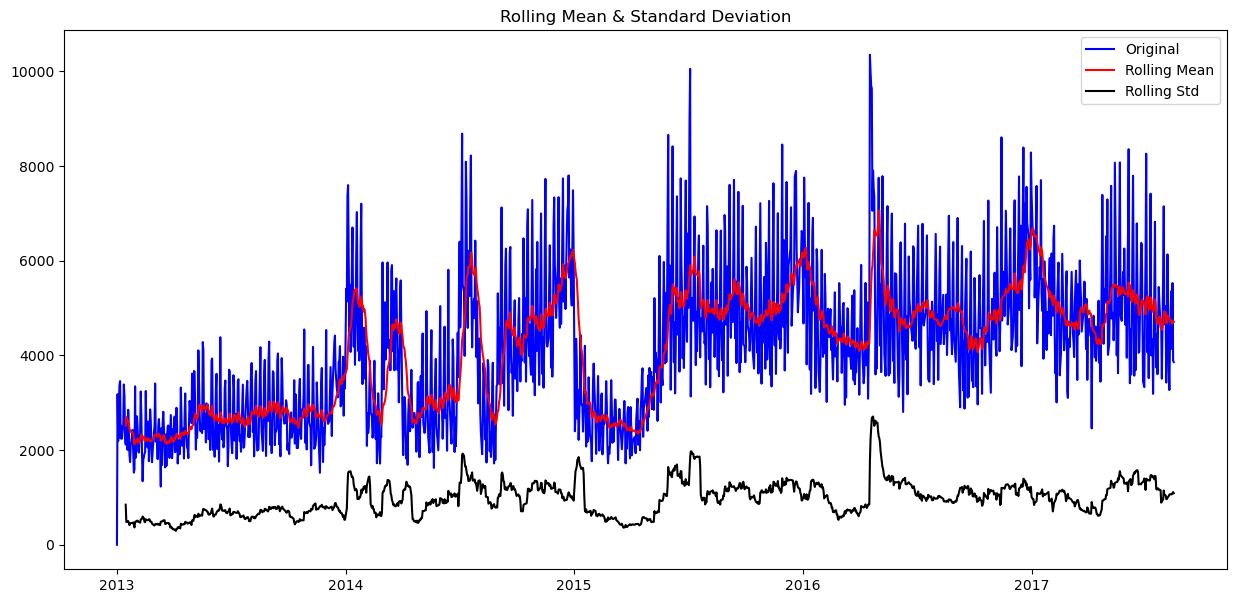

Results of Dickey-Fuller Test:
Test Statistic                   -3.856896
p-value                           0.002376
#Lags Used                       18.000000
Number of Observations Used    1426.000000
Critical Value (1%)              -3.434944
Critical Value (5%)              -2.863569
Critical Value (10%)             -2.567850
dtype: float64


In [17]:
test_stationarity(data_complet)

Test statistic is smaller than all critical values (1%, 5% and 10%), and p-value is smaller than 5% (if we take 95% as confidence level). Null hypothesis can be rejected, we can conclude that our data is stationary (it has some time dependent component).
We can go to the next level which is time series prediction.

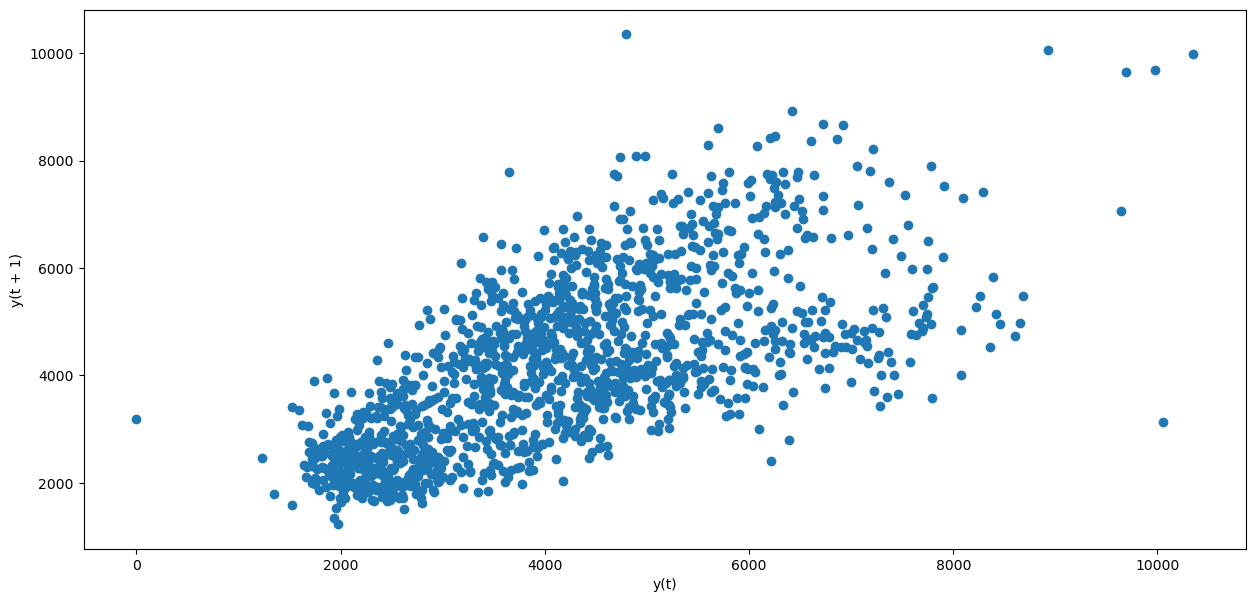

In [18]:
#Correlation between (n) value and (n+1) value
from pandas.plotting import lag_plot
lag_plot(data_complet)
plt.show()

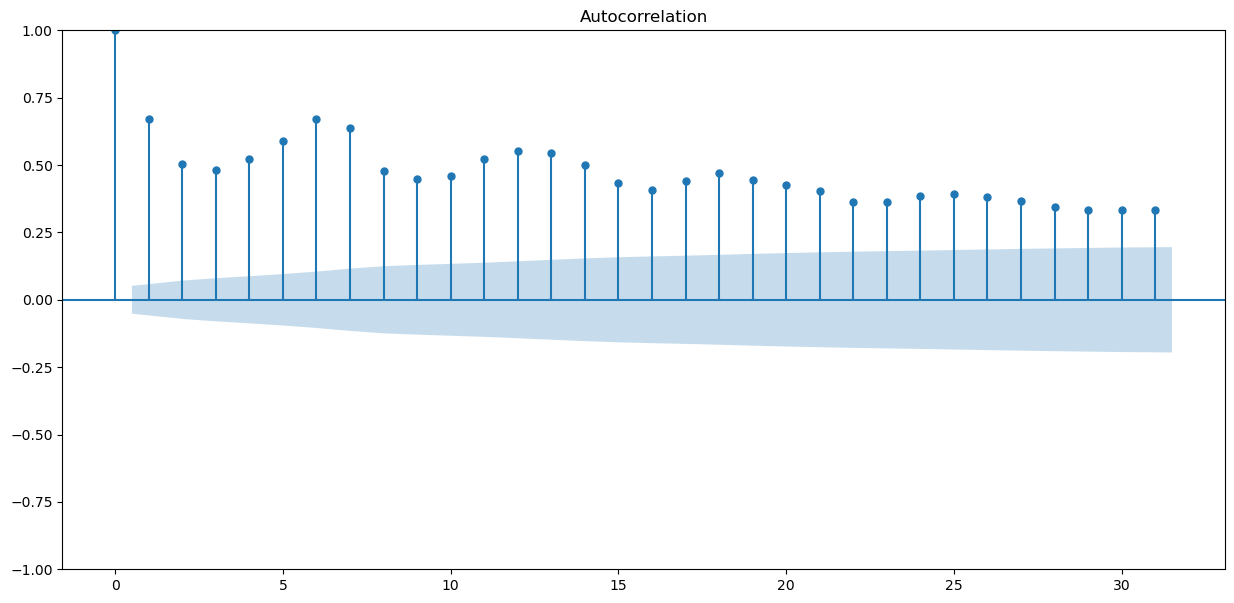

In [19]:
#Correlation coef. by lag (lag1 -> n-1, lag2 ->n-2)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_complet, lags=31)
plt.show()

### Autoregression model (linear regression)
with lags=31

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test RMSE: 1234.179


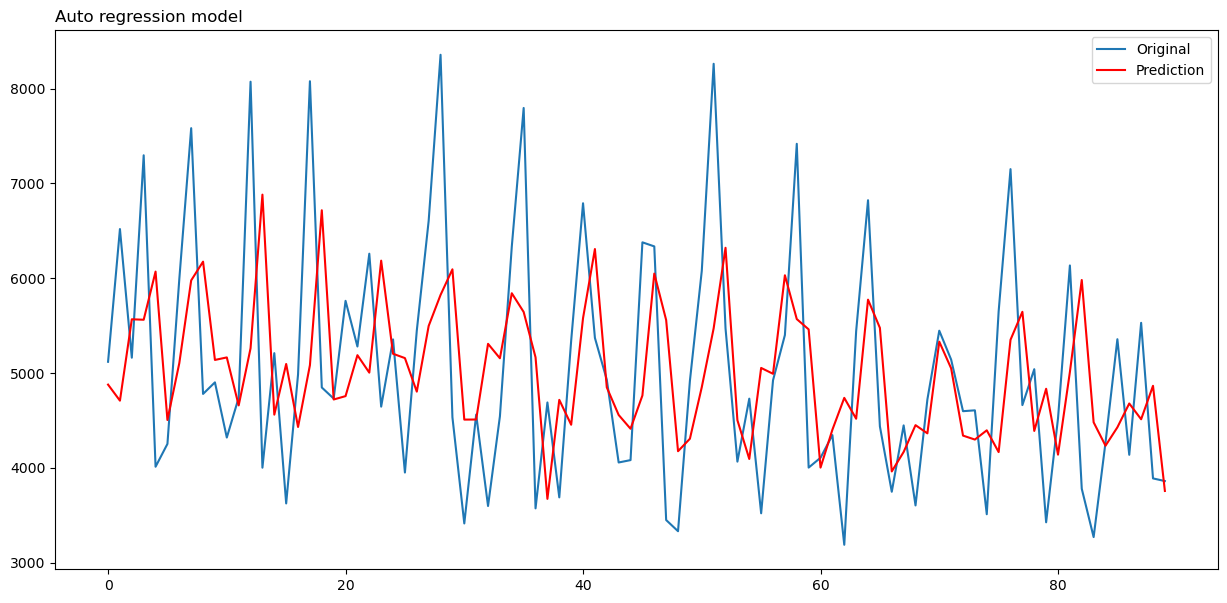

In [20]:
#Autoregression (linear regression)
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

#Last 3 months for validation
X=pd.DataFrame(data_complet.sales)
train, test = X[0:len(X)-90], X[len(X)-90:]
train.reset_index(drop=True)
test.reset_index(drop=True, inplace=True)


window=7
model=AutoReg(train,lags=7)
model_fit=model.fit()
coef= model_fit.params
history = train[len(train)-window:]
history = [history.iloc[i] for i in range(len(history))]

predictions=list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test.iloc[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test, label='Original')
pyplot.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('Auto regression model', loc='left')
pyplot.show()


### Define and split data

In [80]:
#Split data into train and validation dataset
import datetime

data_complet = df_train[(df_train.family=='BEVERAGES') & 
              (df_train.store_nbr==51)][['date','sales']]
data_complet = data_complet[data_complet.duplicated('date')==False]
data_complet = data_complet[data_complet['sales'].notnull()]
data_complet['datetime'] = pd.to_datetime(data_complet['date'])
data_complet = data_complet.set_index('datetime').asfreq('d')
data_complet.sales[data_complet.sales.isnull()]=0
data_complet.drop(['date'], axis=1, inplace=True)
train, test = data_complet[1:len(data_complet)-90], data_complet[len(data_complet)-90:]


## Auto-Arima

#### 1- with pmdarima library

In [81]:
import pmdarima as pm
auto_arima_model_pm= pm.auto_arima(y=train)

print(auto_arima_model_pm.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1597
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13088.458
Date:                Wed, 19 Oct 2022   AIC                          26198.915
Time:                        11:29:01   BIC                          26258.043
Sample:                             0   HQIC                         26220.874
                               - 1597                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9317      0.038     24.811      0.000       0.858       1.005
ar.L2         -1.5362      0.031    -49.050      0.000      -1.598      -1.475
ar.L3          0.9723      0.052     18.758      0.0

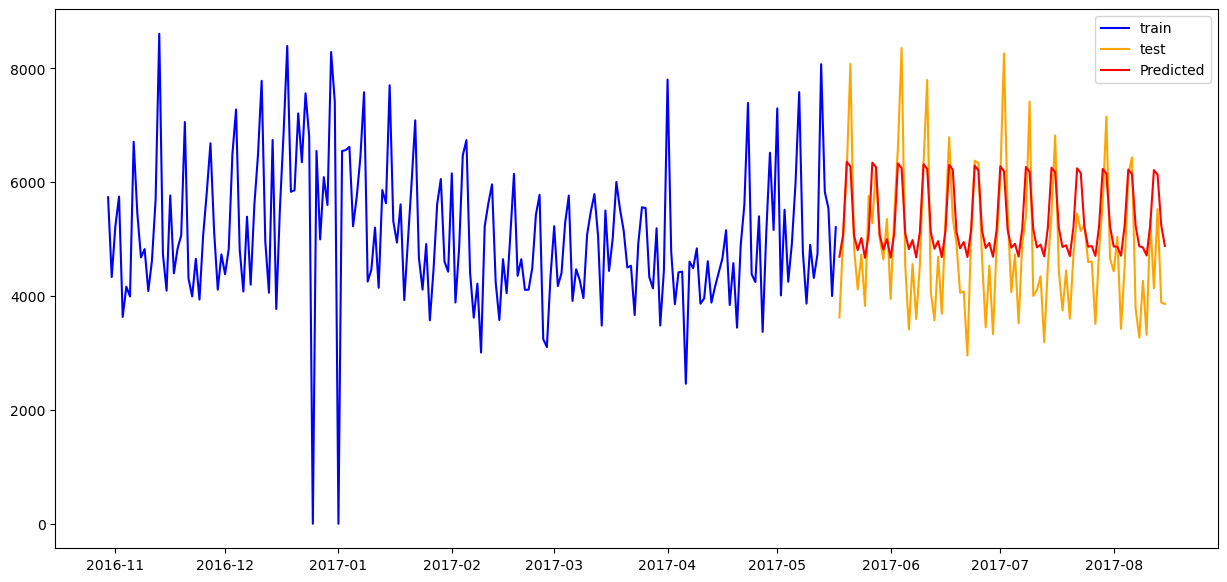

In [82]:
dd=pd.DataFrame(auto_arima_model_pm.predict(n_periods=90))
dd.index=test.index

plt.plot(train[-200:], color='blue', label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Predicted')
plt.legend(loc='best')

In [83]:
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)


r_squared=r2_score(test.sales,dd)
print('R squared score: %.1f' % (100.0 * r_squared),'%')

Test RMSE: 900.352
R squared score: 44.1 %


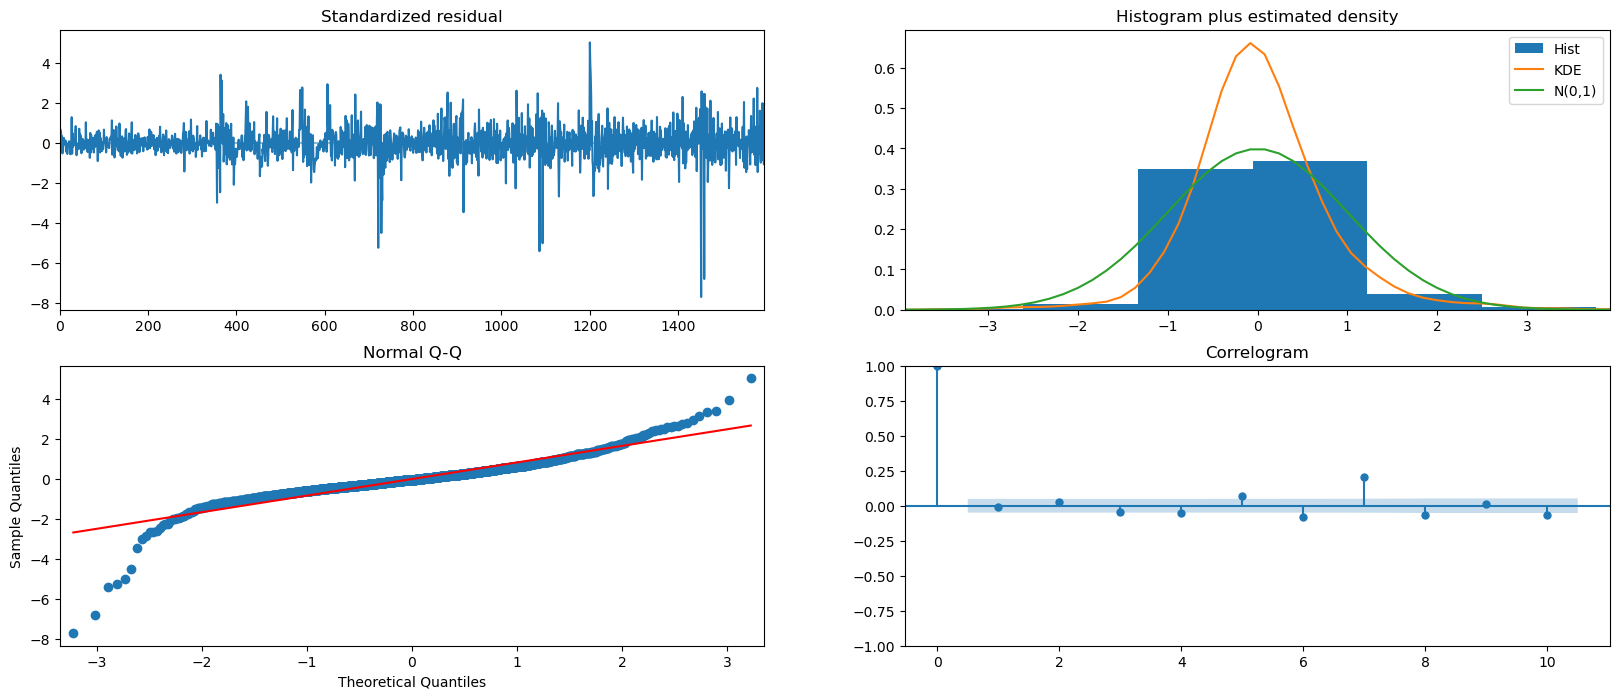

In [84]:
auto_arima_model_pm.plot_diagnostics(figsize=(20,8))
plt.show()

Auto Arima with sktime to confirm my results

#### 2- with sktime library

In [26]:
from sktime.forecasting.arima import AutoARIMA

AutoArima_model_sk = AutoARIMA(seasonal=True, sp=12, trace=True)
AutoArima_model_sk.fit(train)
print(AutoArima_model_sk.summary())

Performing stepwise search to minimize aic


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=26765.451, Time=8.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=27385.528, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=27247.532, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=26902.650, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=27383.530, Time=0.01 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=26772.907, Time=7.49 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=26793.541, Time=6.15 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=26739.974, Time=34.47 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=26738.774, Time=30.37 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=26732.137, Time=8.13 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=26786.241, Time=3.00 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=26733.926, Time=13.16 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=26752.086, Time=6.46 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=26746.106, Time=11.36 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=26773.393, Time=19.55 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=26699.046, Time=29.21 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(1,0,0)[12] intercept   : AIC=26747.029, Time=6.31 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(2,0,1)[12] intercept   : AIC=26734.146, Time=32.37 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(1,0,1)[12] intercept   : AIC=26739.451, Time=10.41 sec
 ARIMA(0,1,3)(2,0,0)[12] intercept   : AIC=26726.478, Time=22.24 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=41.05 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,4)(2,0,0)[12] intercept   : AIC=26695.597, Time=31.52 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,4)(1,0,0)[12] intercept   : AIC=26723.001, Time=6.17 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,4)(2,0,1)[12] intercept   : AIC=26727.298, Time=35.13 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,4)(1,0,1)[12] intercept   : AIC=26728.971, Time=11.99 sec
 ARIMA(0,1,4)(2,0,0)[12] intercept   : AIC=26700.824, Time=23.01 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,4)(2,0,0)[12] intercept   : AIC=26679.419, Time=39.93 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,4)(1,0,0)[12] intercept   : AIC=26700.851, Time=8.55 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,4)(2,0,1)[12] intercept   : AIC=26688.096, Time=41.01 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,4)(1,0,1)[12] intercept   : AIC=26692.697, Time=14.53 sec
 ARIMA(3,1,4)(2,0,0)[12] intercept   : AIC=26685.992, Time=36.00 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,5)(2,0,0)[12] intercept   : AIC=26458.062, Time=45.46 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,5)(1,0,0)[12] intercept   : AIC=26468.812, Time=9.32 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,5)(2,0,1)[12] intercept   : AIC=26471.388, Time=50.16 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,5)(1,0,1)[12] intercept   : AIC=26471.272, Time=18.31 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,5)(2,0,0)[12] intercept   : AIC=26663.519, Time=39.29 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,5)(2,0,0)[12] intercept   : AIC=26452.376, Time=63.57 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,5)(1,0,0)[12] intercept   : AIC=26463.034, Time=12.44 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,5)(2,0,1)[12] intercept   : AIC=26461.243, Time=63.95 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,5)(1,0,1)[12] intercept   : AIC=26462.137, Time=21.64 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,5)(2,0,0)[12] intercept   : AIC=26257.311, Time=66.66 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,5)(1,0,0)[12] intercept   : AIC=26266.184, Time=16.67 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,5)(2,0,1)[12] intercept   : AIC=26261.934, Time=73.37 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,5)(1,0,1)[12] intercept   : AIC=26266.891, Time=22.06 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,4)(2,0,0)[12] intercept   : AIC=26447.622, Time=59.84 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(2,0,0)[12] intercept   : AIC=26187.967, Time=76.93 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(1,0,0)[12] intercept   : AIC=26195.479, Time=19.16 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(2,0,1)[12] intercept   : AIC=26187.178, Time=82.18 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(1,0,1)[12] intercept   : AIC=26186.392, Time=22.78 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(0,0,1)[12] intercept   : AIC=26189.230, Time=21.96 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(1,0,2)[12] intercept   : AIC=inf, Time=95.64 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(0,0,0)[12] intercept   : AIC=26201.312, Time=2.50 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(0,0,2)[12] intercept   : AIC=26189.872, Time=87.16 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(2,0,2)[12] intercept   : AIC=26193.745, Time=92.44 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,4)(1,0,1)[12] intercept   : AIC=26298.964, Time=17.14 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,4)(1,0,1)[12] intercept   : AIC=26440.907, Time=17.38 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(1,0,1)[12]             : AIC=26184.457, Time=19.51 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(0,0,1)[12]             : AIC=26193.200, Time=16.87 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(1,0,0)[12]             : AIC=26194.356, Time=14.46 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(2,0,1)[12]             : AIC=26191.820, Time=62.51 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(1,0,2)[12]             : AIC=26192.046, Time=78.47 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(0,0,0)[12]             : AIC=26198.915, Time=2.26 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,5)(0,0,2)[12]             : AIC=26180.276, Time=60.83 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,5)(0,0,2)[12]             : AIC=26259.995, Time=68.27 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(5,1,4)(0,0,2)[12]             : AIC=26293.011, Time=46.27 sec


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,4)(0,0,2)[12]             : AIC=26444.362, Time=53.66 sec

Best model:  ARIMA(5,1,5)(0,0,2)[12]          
Total fit time: 2062.085 seconds
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 1597
Model:             SARIMAX(5, 1, 5)x(0, 0, [1, 2], 12)   Log Likelihood              -13077.138
Date:                                 Mon, 10 Oct 2022   AIC                          26180.276
Time:                                         08:38:33   BIC                          26250.155
Sample:                                              0   HQIC                         26206.228
                                                - 1597                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Text(0.0, 1.0, 'Auto ARIMA (sktime)')

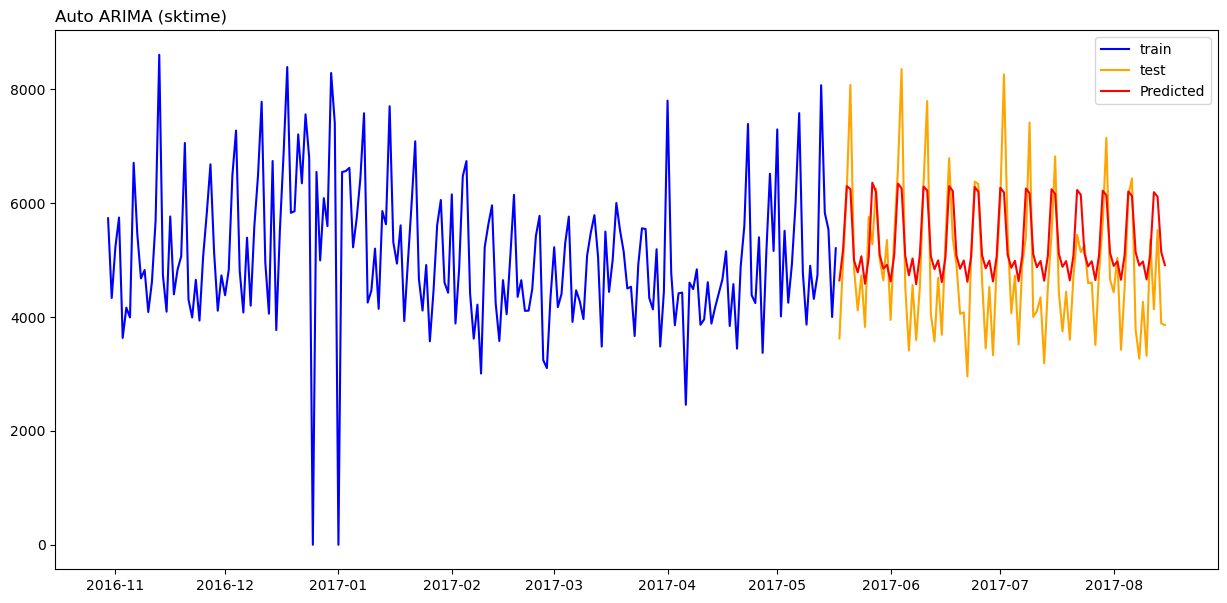

In [27]:
dd = pd.DataFrame(AutoArima_model_sk.predict(test.index))
dd.index = test.index

plt.plot(train[-200:], color="blue", label="train")
plt.plot(test, color="orange", label='test')
plt.plot(dd, color='red', label='Predicted')
plt.legend(loc='best')
plt.title("Auto ARIMA (sktime)",loc="left")

#rmse = sqrt(mean_squared_error(train, AutoArima_model.fittedvalues))
#print('Test RMSE: %.3f' % rmse)

In [28]:
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)

R_2 = r2_score(test, dd)
print('R2 score: %.1f' % R_2, ' %')

Test RMSE: 884.152
R2 score: 0.5  %


## ARIMA model

Test RMSE: 1206.589


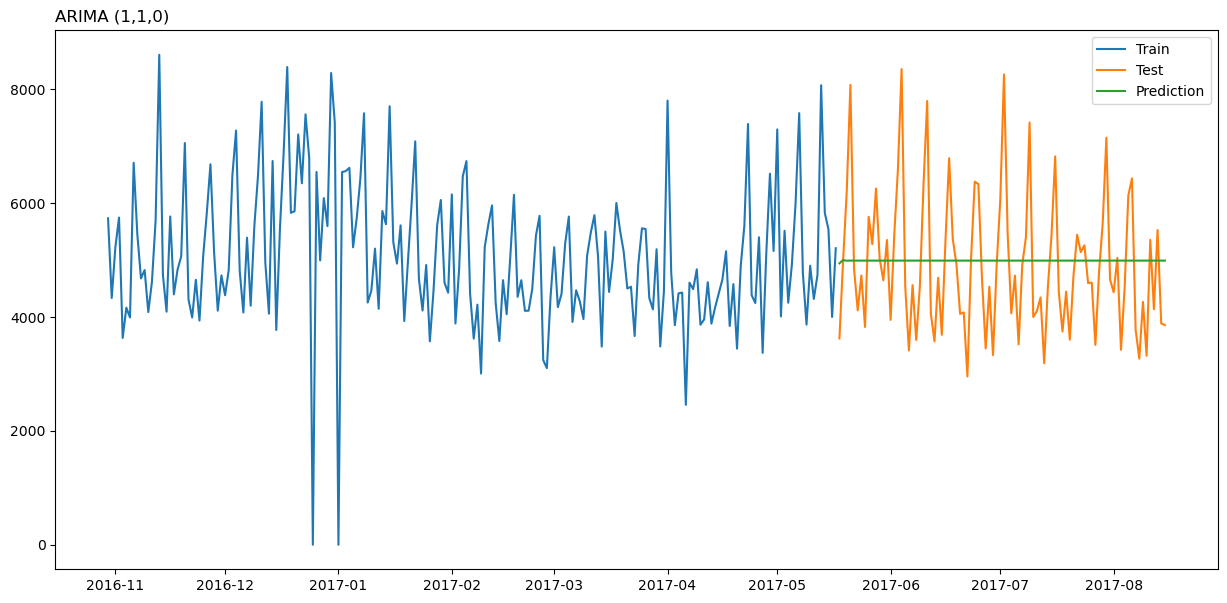

In [85]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train,order=(1,1,0))
arima_results = arima_model.fit()
dd=pd.DataFrame(arima_results.forecast(90))
dd.index=test.index
plt.plot(train[-200:], label='Train')
plt.plot(test, label='Test')
plt.plot(dd,label='Prediction')
plt.legend(loc='best')
plt.title('ARIMA (1,1,0)',loc='left')

rmse = sqrt(mean_squared_error(test.sales, dd))
print('Test RMSE: %.3f' % rmse)

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 900.352


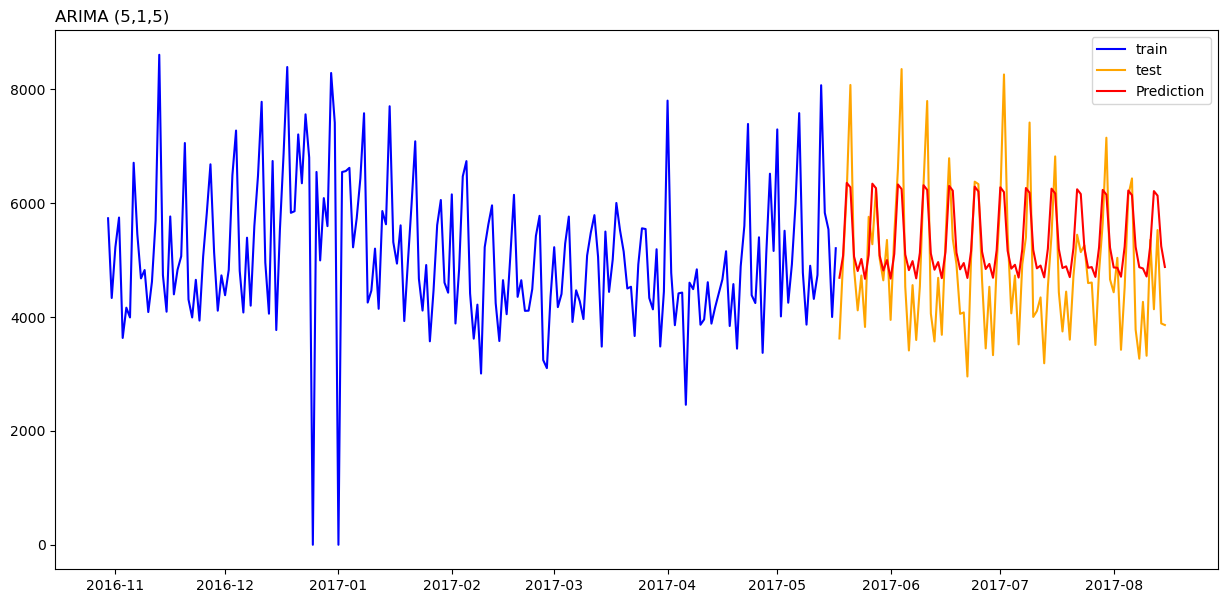

In [86]:
arima_model = ARIMA(train,order=(5,1,5))
arima_results = arima_model.fit()
dd=pd.DataFrame(arima_results.forecast(90))
dd.index=test.index
plt.plot(train[-200:], color="blue", label='train')
plt.plot(test, color="orange", label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('ARIMA (5,1,5)', loc='left')
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1103.990


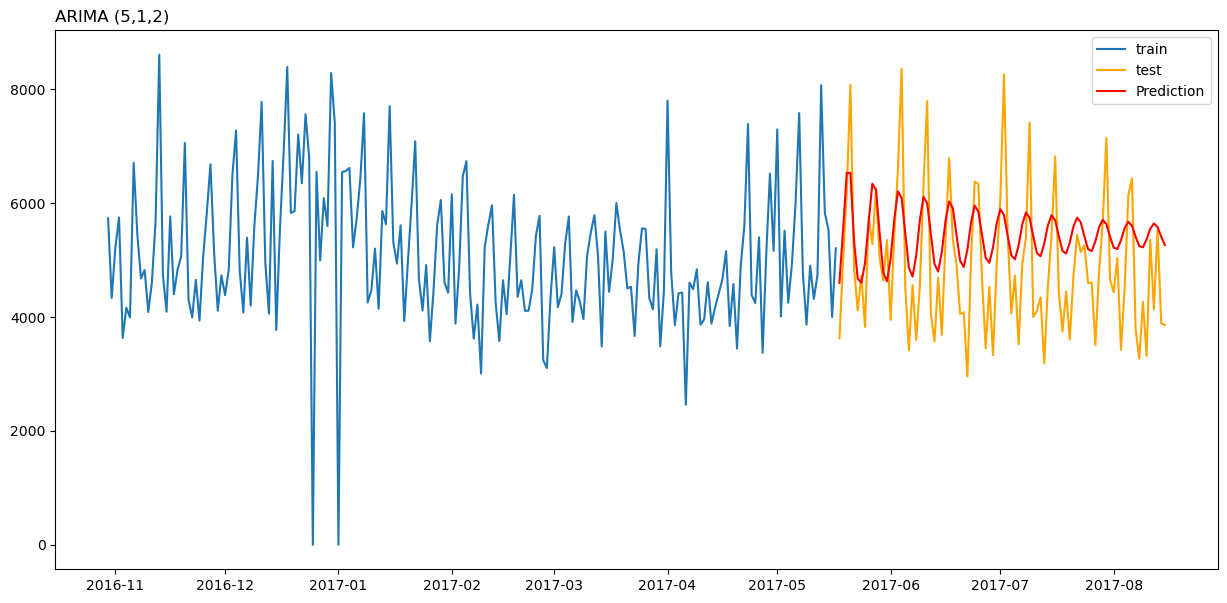

In [87]:
arima_model = ARIMA(train,order=(5,1,2))
arima_model_fit = arima_model.fit()

dd= pd.DataFrame(arima_model_fit.forecast(steps=90),index=test.index)
plt.plot(train[-200:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('ARIMA (5,1,2)', loc='left')
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'ARIMA [31, 2, 30]')

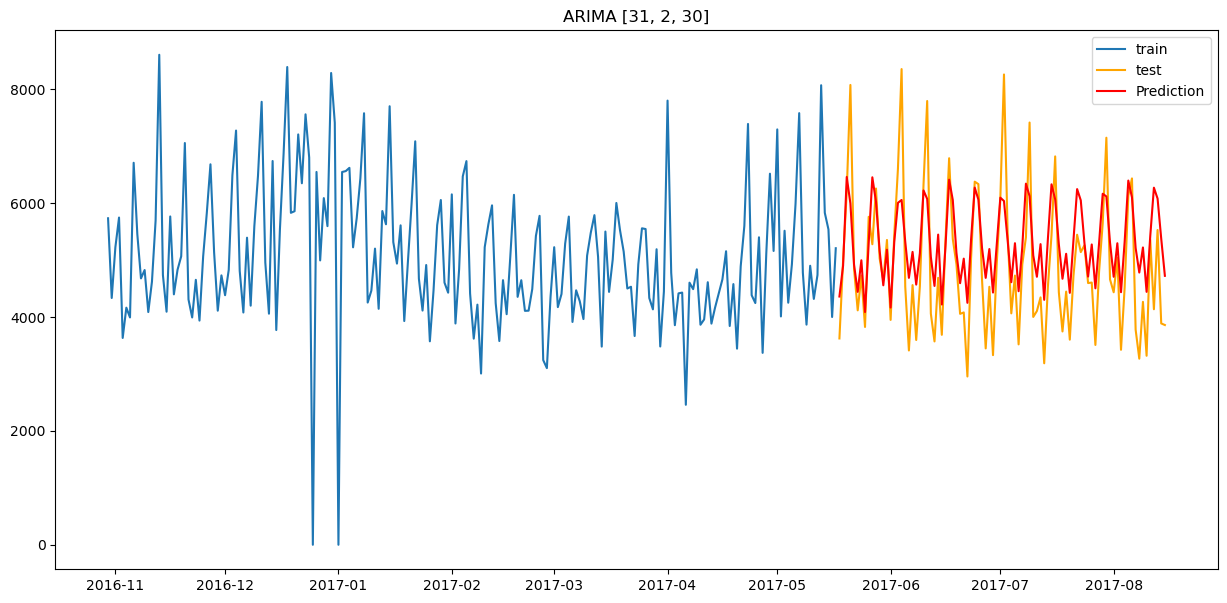

In [88]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train,order=(31,2,30))
arima_results = arima_model.fit()
dd=pd.DataFrame(arima_results.forecast(90), index=test.index)
plt.plot(train[-200:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title("ARIMA [31, 2, 30]")

In [90]:
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)
R_2 = r2_score(test, dd)*100
print('R2 score: %.1f' % R_2, ' %')

Test RMSE: 873.993
R2 score: 47.3  %


### Naive Seasonal

In [91]:
from sktime.forecasting.naive import NaiveForecaster

naiveSeasonal_model= NaiveForecaster(strategy='mean', sp=7,window_length=31)
naiveSeasonal_model_fit= naiveSeasonal_model.fit(train)
prediction = pd.DataFrame(naiveSeasonal_model_fit.predict(test.index), index=test.index)

print("RMSE of naive seasonal model: %.3f" % sqrt(mean_squared_error(test,prediction)))
R_squared = r2_score(test, prediction)*100
print("R2 score of naive seasonal model: %.1f" % R_squared, " %")

RMSE of naive seasonal model: 765.623
R2 score of naive seasonal model: 59.6  %


Text(0.0, 1.0, 'Naive forecast')

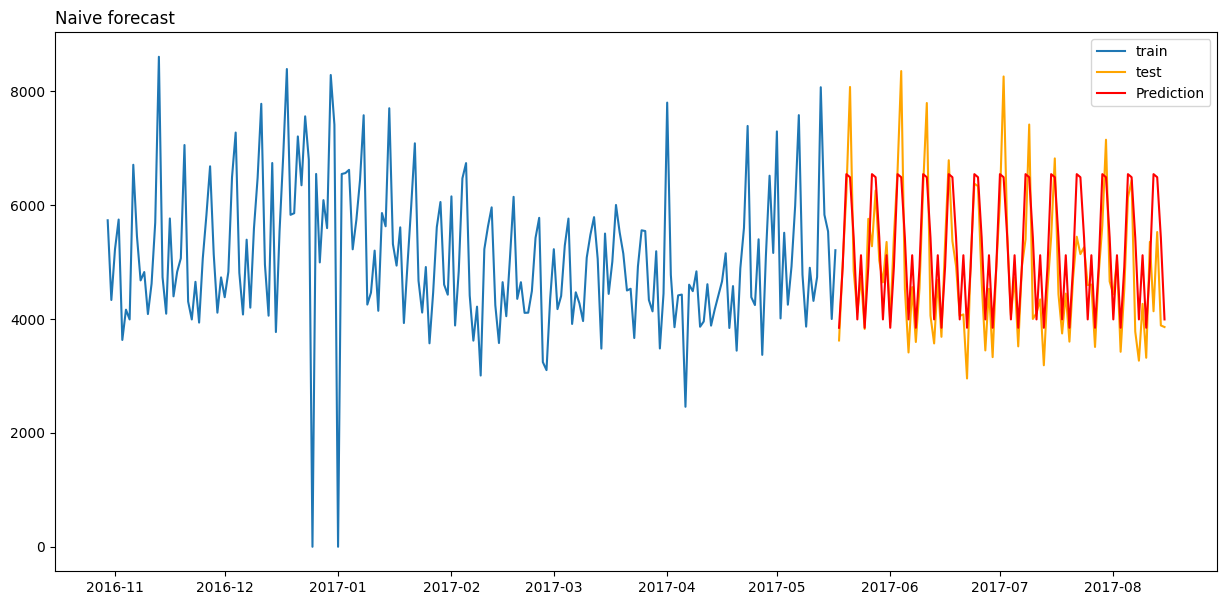

In [32]:
plt.plot(train[-200:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(prediction, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('Naive forecast', loc='left')

### Prophet

install prophet correctly
fbprophet / prophet / sktime
Darts doesn't work

In [92]:
from fbprophet import Prophet

prophet_model=Prophet()
prophet_model.fit(train)
prediction = prophet_model.historical_forecasts(train, start=0.5,stride=7)
#pred=prediction.to_dataframe()
#pred=pd.concat([prediction[i].to_pandas() for i in range(90)])
#print(prediction)
print("Mape of Prohet model: %.2f" % mape(series[:-90],prediction))
series[:-90].plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

ModuleNotFoundError: No module named 'fbprophet'

#### 2- with sktime library

In [93]:
#holidays
df_holidays=df_train[(df_train.family=='BEVERAGES') & 
              (df_train.store_nbr==51)][['date','type_y']]
type_holidays = df_holidays.type_y.drop_duplicates()
print(type_holidays)
df_holidays = df_holidays[df_holidays.type_y=='Holiday']
#df_holidays = df_holidays.date.drop_dupplicates()
df_holidays.columns=['ds','holiday']
print(df_holidays)

1521          Holiday
3303              NaN
8649         Work Day
233181     Additional
236485          Event
512955       Transfer
1307466        Bridge
Name: type_y, dtype: object
                ds  holiday
1521    2013-01-01  Holiday
74583   2013-02-11  Holiday
76365   2013-02-12  Holiday
108441  2013-03-02  Holiday
161901  2013-04-01  Holiday
...            ...      ...
2977201 2017-07-03  Holiday
3013101 2017-07-23  Holiday
3036267 2017-08-05  Holiday
3045177 2017-08-10  Holiday
3054087 2017-08-15  Holiday

[171 rows x 2 columns]


Test RMSE: 833.899
R2 score of Prophet model: 52.0  %


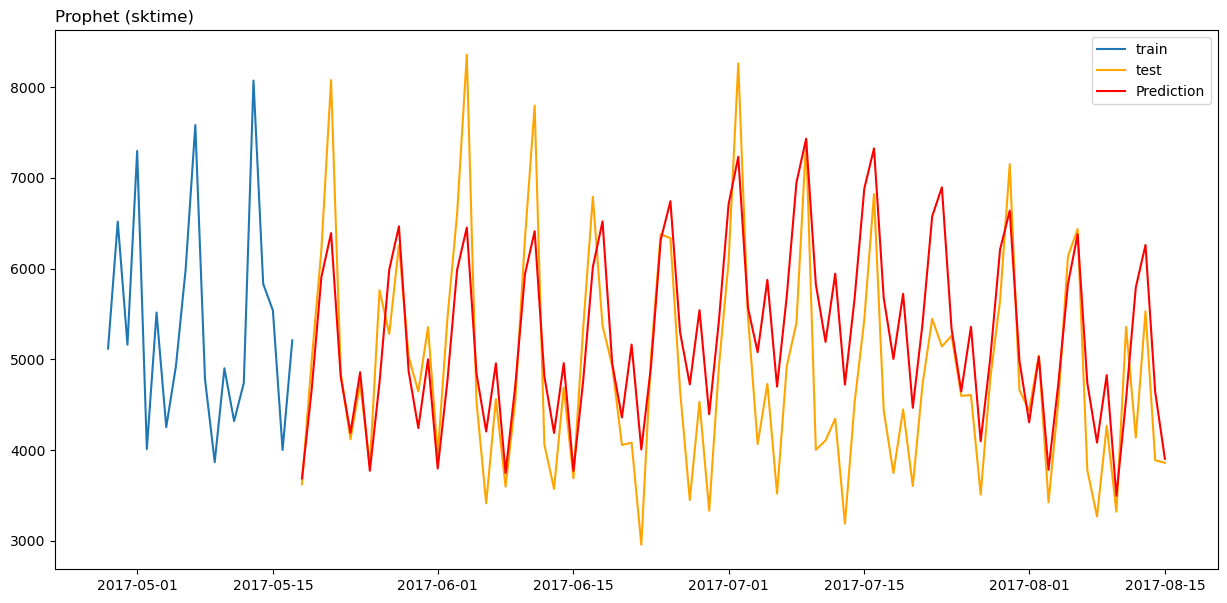

In [94]:
from sktime.forecasting.fbprophet import Prophet

Prophet_model_sktime=Prophet(weekly_seasonality=True, yearly_seasonality=True,
                            seasonality_mode='multiplicative', holidays=df_holidays,
                            seasonality_prior_scale=8, holidays_prior_scale=15, n_changepoints=220)
#Prophet_model_sktime=Prophet(weekly_seasonality=True, yearly_seasonality=True,
#                            seasonality_mode='multiplicative')

Prophet_model_sktime_fit=Prophet_model_sktime.fit(train)

prediction=Prophet_model_sktime_fit.predict(test.index)

dd=pd.DataFrame(prediction, index=test.index)
plt.plot(train[-20:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('Prophet (sktime)', loc='left')

rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)

R2_score = r2_score(test, dd)*100
print('R2 score of Prophet model: %.1f' % R2_score, ' %')

### TBATS

#### with tbats library

In [95]:
from tbats import TBATS,BATS
model_tbats=TBATS(seasonal_periods=[7,15,30,365])
model_tbats_fit=model_tbats.fit(train)
dd=pd.DataFrame(model_tbats_fit.forecast(90),index=test.index)


Test RMSE: 858.091
R2 score of TBATS model: 49.2  %


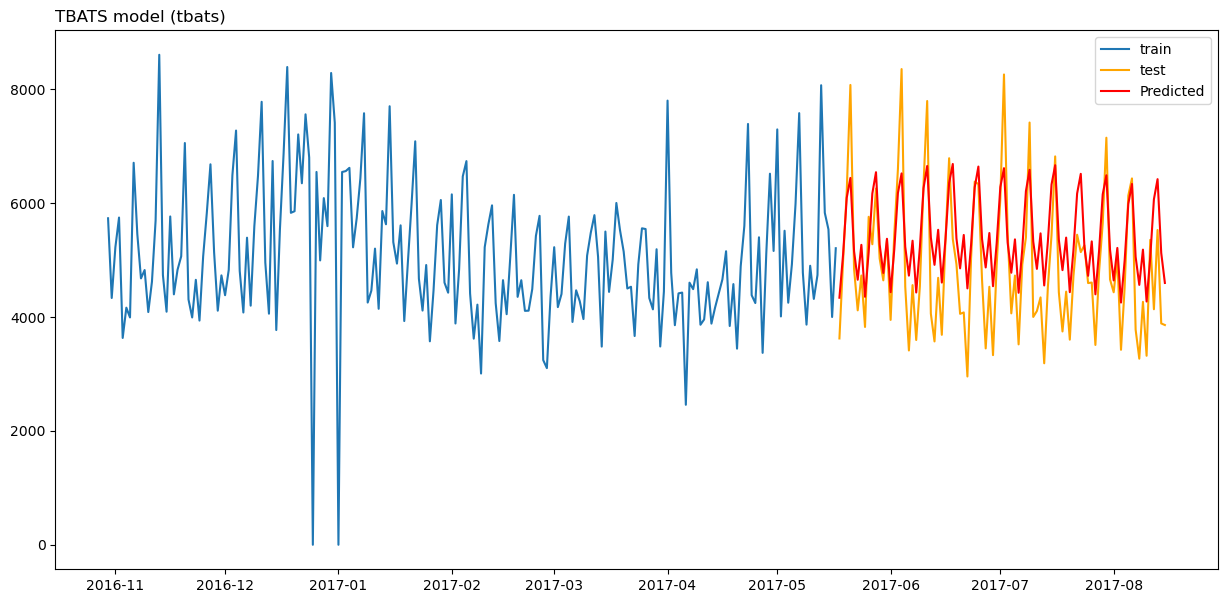

In [96]:
plt.plot(train[-200:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Predicted')
plt.legend(loc='best')
plt.title('TBATS model (tbats)', loc='left')
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)
R2_score = r2_score(test, dd)*100
print('R2 score of TBATS model: %.1f' % R2_score, ' %')

#### with sktime library

In [97]:
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.base import ForecastingHorizon
model_TBATS=TBATS(use_box_cox=True, use_trend=True, use_damped_trend=True,
                  sp=[7,14,30,365], use_arma_errors=True)
model_TBATS.fit(train)

TBATS(sp=[7, 14, 30, 365], use_box_cox=True, use_damped_trend=True,
      use_trend=True)

In [98]:
tbats_results = model_TBATS.predict(test.index)
rmse = sqrt(mean_squared_error(test, tbats_results))
print('Test RMSE: %.3f' % rmse)
R2_score = r2_score(test, tbats_results)*100
print('R2 score of tbats model (sktime): %.1f' % R2_score, ' %')

Test RMSE: 865.481
R2 score of tbats model (sktime): 48.3  %


Text(0.0, 1.0, 'TBATS prediction (sktime)')

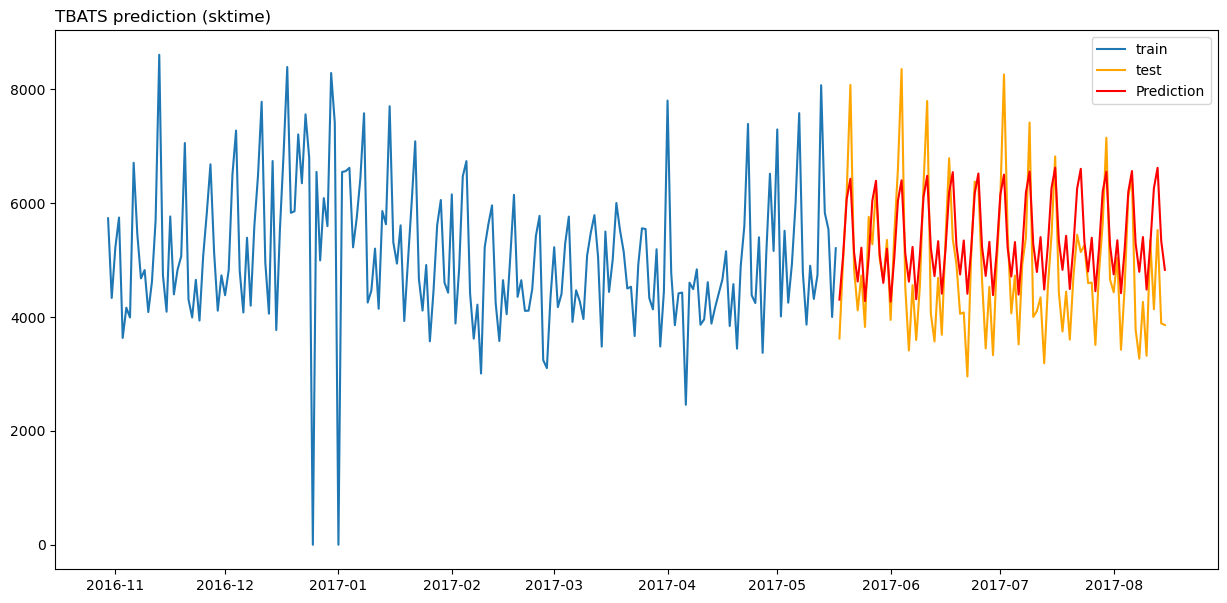

In [99]:
dd=pd.DataFrame(tbats_results,index=test.index)
plt.plot(train[-200:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('TBATS prediction (sktime)', loc='left')

### Elastic net regression

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import ElasticNet

### Random Forest Regressor

R2 score of random forest model (sklearn): 60.8  %


Text(0.0, 1.0, 'Random Forest Regressor (sklearn)')

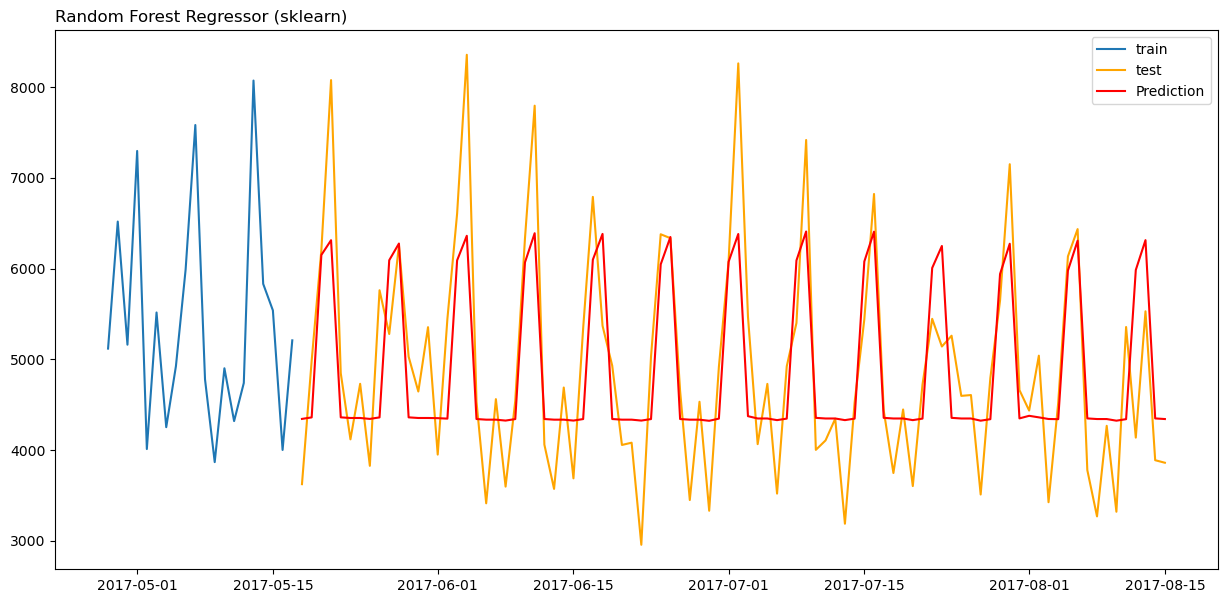

In [29]:
from sklearn.ensemble import RandomForestRegressor
RandForest_model=RandomForestRegressor(
    criterion='squared_error',
    n_estimators=100,
    max_depth=5,
    min_samples_split=3,
    random_state=1
)
RandForest_model.fit(x_train, y_train)
dd=pd.DataFrame(RandForest_model.predict(x_test), index=test.index)

R2_score = r2_score(y_test, dd)*100
print('R2 score of random forest model (sklearn): %.1f' % R2_score, ' %')

plt.plot(y_train[-20:], label='train')
plt.plot(y_test, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('Random Forest Regressor (sklearn)', loc='left')



#### Optimization with GridSearchCV

In [280]:
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor(random_state=42)

param_grid = { 
    #'n_estimators': [10, 50, 100, 200, 500],
    'n_estimators': [20, 50, 100, 200, 1000],
    #max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,30,40,50,60,70,80,90,100],
    #'criterion' :['squared_error', 'absolute_error', 'poisson'],
    'criterion' : ['squared_error'],
    'min_samples_split': [3],
    'random_state': [1]
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(x_train, y_train)
"""
RandForest_model=RandomForestRegressor(
    criterion='squared_error',
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    random_state=0
)
"""
print(CV_rfr.best_params_)


KeyboardInterrupt



R2 score of random forest model (sklearn): 78.5  %


Text(0.0, 1.0, 'Random Forest Regressor (sklearn)')

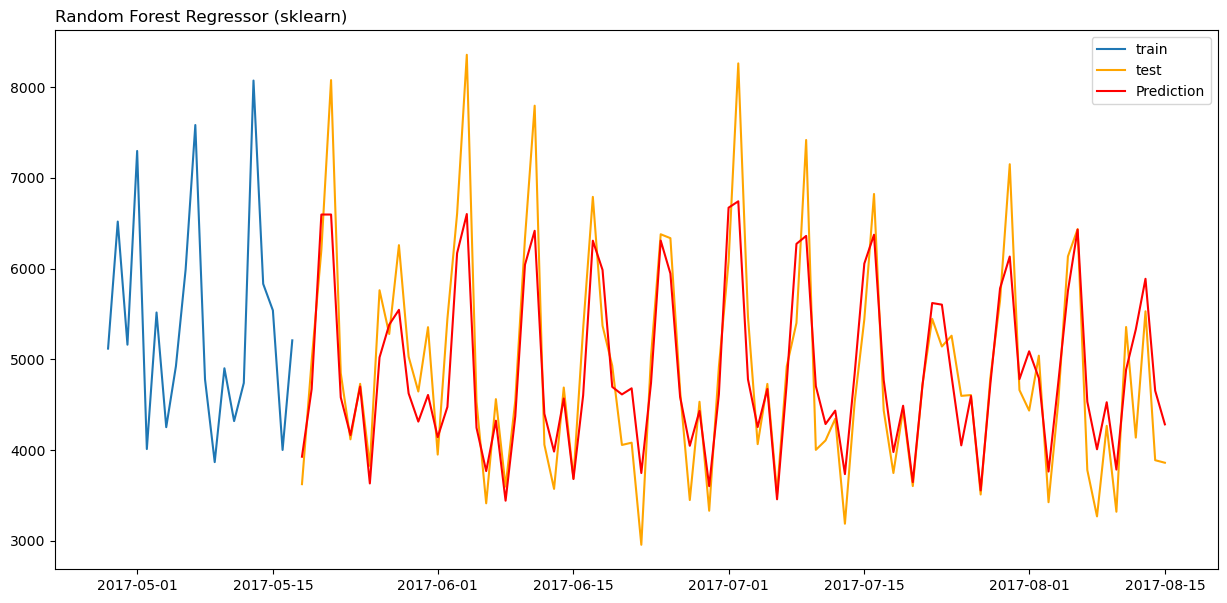

In [281]:
RandForest_model=RandomForestRegressor(
    criterion='squared_error',
    n_estimators=2000,
    max_depth=100,
    min_samples_split=3,
    random_state=1
)
RandForest_model.fit(x_train, y_train)
dd=pd.DataFrame(RandForest_model.predict(x_test), index=test.index)

R2_score = r2_score(y_test, dd)*100
print('R2 score of random forest model (sklearn): %.1f' % R2_score, ' %')

plt.plot(y_train[-20:], label='train')
plt.plot(y_test, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('Random Forest Regressor (sklearn)', loc='left')

#### Bayesian optimization with hyperopt

100%|█████████████████████████████████████████████| 100/100 [18:33<00:00, 11.13s/trial, best loss: -0.8023220295362524]
R2-Value: 0.8023220295362524
RandomForestRegressor(ccp_alpha=0.019408421396362757,
                      criterion='absolute_error', max_depth=74,
                      max_features='auto', n_estimators=415)
R2 score of Random forest regressor: 80.2  %


Text(0.0, 1.0, 'Random forest Regression (R2 score 80.2%)')

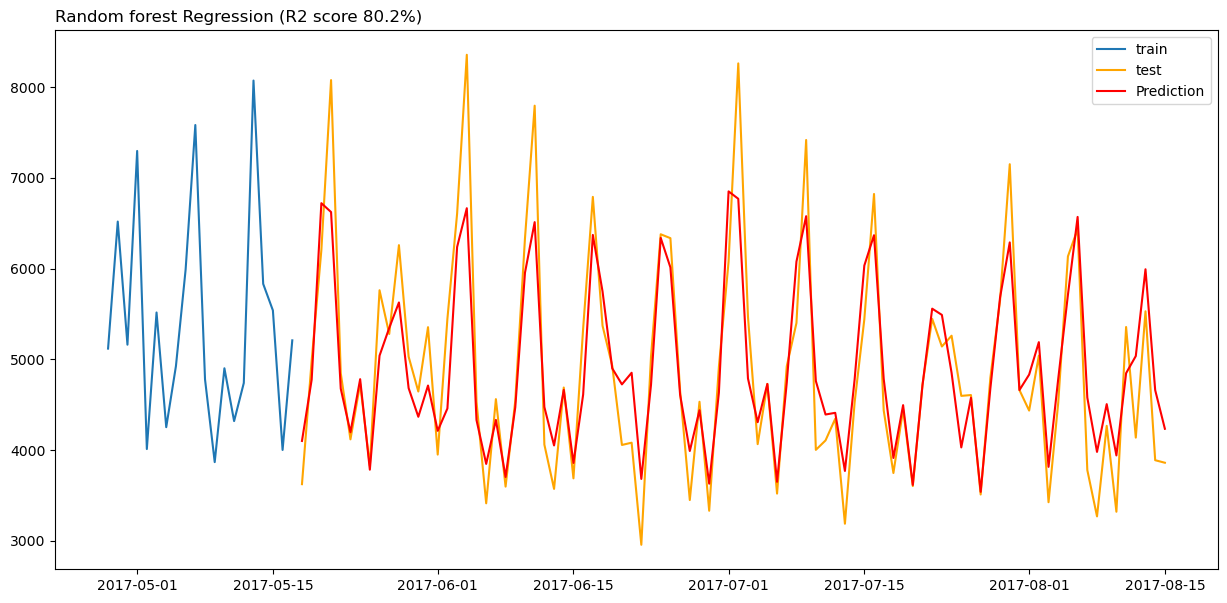

In [39]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import random

def objective_function(params):
    params={
        'n_estimators':int(params['n_estimators']),
        'criterion': params['criterion'],
        'max_depth':int(params['max_depth']),
#        'min_samples_split':int(params['min_samples_split']),
#        'min_weight_fraction_leaf': params['min_weight_fraction_leaf'],
        'max_features': params['max_features'],
#        'max_leaf_nodes': int(params['max_leaf_nodes']),
#        'bootstrap': params['bootstrap'],
#        'verbose': int(params['verbose']),
#        'warm_start': params['warm_start'],
        'ccp_alpha': params['ccp_alpha'],
    }
    clf=RandomForestRegressor(**params)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)

    # score the model
    score = r2_score(y_true=Y_test, y_pred=pred)
    return {'loss': -score, 'status': STATUS_OK, 'model': clf,'pred':pred}



# define the hyperparameter space
params = {
    'n_estimators': hp.quniform('n_estimators',3, 1000,1),
    'criterion': hp.choice('criterion', ['squared_error', 'absolute_error', 'poisson']),
    'max_depth': hp.quniform('max_depth', 3, 100, 1),
#    'min_samples_split': hp.quniform('min_samples_split', 2, 50, 1),
#    'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf',0,0.5),
    'max_features': hp.choice('max_features',['auto', 'sqrt', 'log2']),
#    'max_leaf_nodes': hp.quniform('max_leaf_nodes',1,1000,1),
#    'bootstrap': hp.choice('bootstrap', [True, False]),
#    'verbose': hp.quniform('verbose',0,10,1),
#    'warm_start': hp.choice('warm_start',[True, False]),
    'ccp_alpha': hp.uniform('ccp_alpha',0,0.8),
}

X_train=x_train.to_numpy()
Y_train=y_train.to_numpy()
X_test=x_test.to_numpy()
Y_test=y_test.to_numpy()

# tune the hyperparameters
trials = Trials()
best_hyperparams = fmin(fn=objective_function, 
                        space=params, 
                        algo=tpe.suggest, 
                        max_evals=100, 
                        trials=trials, 
                        rstate=np.random.default_rng(random.seed(123)))

# extract the best scores
print('R2-Value:', - trials.best_trial['result']['loss'])


# extract the best model
best_model = trials.best_trial['result']['model']
print(best_model)

dd=pd.DataFrame(trials.best_trial['result']['pred'], index=test.index)
R2_score = r2_score(Y_test, dd)*100
print('R2 score of Random forest regressor: %.1f' % R2_score, ' %')

plt.plot(train[-20:].sales, label='train')
plt.plot(test.sales, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('Random forest Regression (R2 score {}%)' .format(round(R2_score,1)), loc='left')

### Exponential smoothing regression

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ExpoSmooth_model = ExponentialSmoothing(train,
                                        trend='add',
                                        damped=True,
                                        seasonal='add',
                                        seasonal_periods=7)

ExpoSmooth_fit = ExpoSmooth_model.fit()
dd= pd.DataFrame(ExpoSmooth_fit.forecast(steps=90),index=test.index)

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Test RMSE: 823.636
R2 score of Exponential smoothing model: 53.2  %


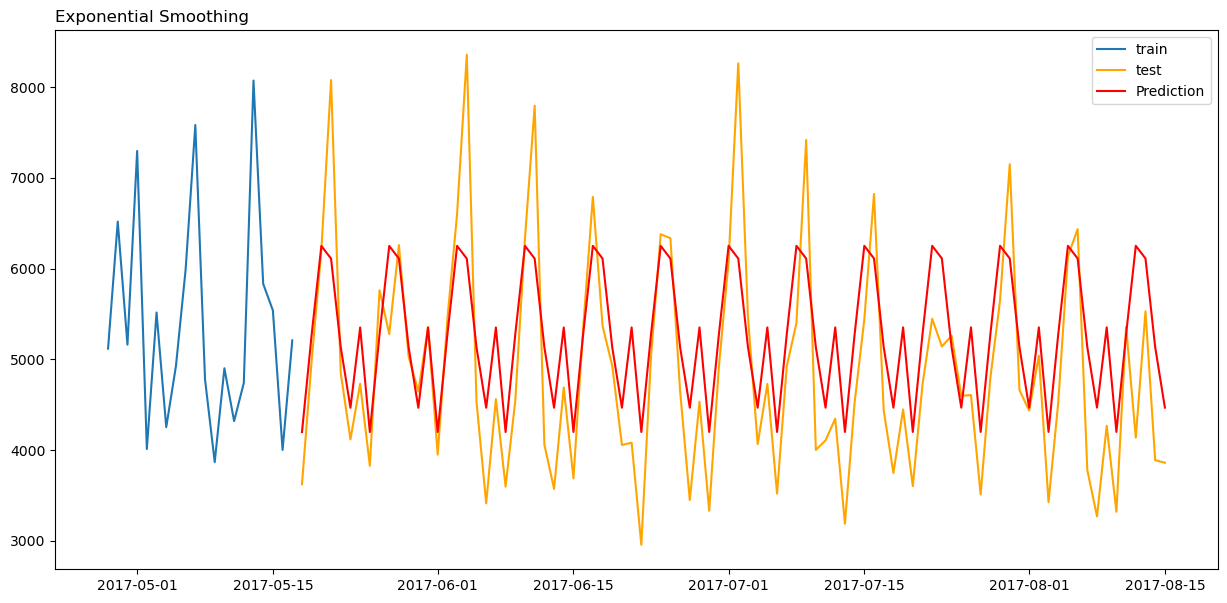

In [46]:
plt.plot(train[-20:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title("Exponential Smoothing", loc="left")
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)
R2_score = r2_score(test, dd)*100
print('R2 score of Exponential smoothing model: %.1f' % R2_score, ' %')

#### Bayesian optimization with hyperopt

  0%|▏                                               | 1/200 [00:00<01:44,  1.91trial/s, best loss: 0.8707377995599652]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  1%|▍                                              | 2/200 [00:00<01:27,  2.25trial/s, best loss: 0.21799601640794686]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  2%|▋                                            | 3/200 [00:01<01:23,  2.37trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  2%|▉                                            | 4/200 [00:01<01:20,  2.43trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  2%|█▏                                           | 5/200 [00:02<01:26,  2.25trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  3%|█▎                                           | 6/200 [00:02<01:22,  2.36trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  4%|█▌                                           | 7/200 [00:03<01:29,  2.16trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  4%|█▊                                           | 8/200 [00:03<01:32,  2.07trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  4%|██                                           | 9/200 [00:04<01:29,  2.14trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  5%|██▏                                         | 10/200 [00:04<01:31,  2.07trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  6%|██▍                                         | 11/200 [00:05<01:28,  2.15trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  6%|██▋                                         | 12/200 [00:05<01:26,  2.16trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  6%|██▊                                         | 13/200 [00:05<01:22,  2.26trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  7%|███                                         | 14/200 [00:06<01:27,  2.13trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  8%|███▎                                        | 15/200 [00:06<01:24,  2.20trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  8%|███▌                                        | 16/200 [00:07<01:22,  2.24trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  8%|███▋                                        | 17/200 [00:07<01:26,  2.11trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



  9%|███▉                                        | 18/200 [00:08<01:23,  2.18trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 10%|████▏                                       | 19/200 [00:08<01:19,  2.28trial/s, best loss: -0.051729419493494966]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 10%|████▌                                         | 20/200 [00:09<01:16,  2.36trial/s, best loss: -0.5321028943402015]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 10%|████▊                                         | 21/200 [00:09<01:14,  2.41trial/s, best loss: -0.5321028943402015]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 11%|█████                                         | 22/200 [00:09<01:13,  2.43trial/s, best loss: -0.5321028943402015]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 12%|█████▎                                        | 23/200 [00:10<01:12,  2.45trial/s, best loss: -0.5321028943402015]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 12%|█████▌                                        | 24/200 [00:10<01:11,  2.45trial/s, best loss: -0.5321028943402015]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 12%|█████▊                                        | 25/200 [00:11<01:10,  2.47trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 13%|█████▉                                        | 26/200 [00:11<01:09,  2.50trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 14%|██████▏                                       | 27/200 [00:11<01:09,  2.49trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 14%|██████▍                                       | 28/200 [00:12<01:13,  2.34trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 14%|██████▋                                       | 29/200 [00:12<01:11,  2.40trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 15%|██████▉                                       | 30/200 [00:13<01:10,  2.43trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 16%|███████▏                                      | 31/200 [00:13<01:10,  2.39trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 16%|███████▎                                      | 32/200 [00:13<01:11,  2.34trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 16%|███████▌                                      | 33/200 [00:14<01:10,  2.36trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 17%|███████▊                                      | 34/200 [00:14<01:09,  2.40trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 18%|████████                                      | 35/200 [00:15<01:07,  2.46trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 18%|████████▎                                     | 36/200 [00:15<01:08,  2.40trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 18%|████████▌                                     | 37/200 [00:16<01:06,  2.43trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 19%|████████▋                                     | 38/200 [00:16<01:07,  2.41trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 20%|████████▉                                     | 39/200 [00:16<01:08,  2.35trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 20%|█████████▏                                    | 40/200 [00:17<01:07,  2.36trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 20%|█████████▍                                    | 41/200 [00:17<01:10,  2.27trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 21%|█████████▋                                    | 42/200 [00:18<01:08,  2.30trial/s, best loss: -0.5321029339370306]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 22%|█████████▉                                    | 43/200 [00:18<01:10,  2.24trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 22%|██████████                                    | 44/200 [00:19<01:11,  2.17trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 22%|██████████▎                                   | 45/200 [00:19<01:13,  2.11trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 23%|██████████▌                                   | 46/200 [00:20<01:12,  2.11trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 24%|██████████▊                                   | 47/200 [00:20<01:16,  1.99trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 24%|███████████                                   | 48/200 [00:21<01:14,  2.03trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 24%|███████████▎                                  | 49/200 [00:21<01:12,  2.07trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 25%|███████████▌                                  | 50/200 [00:22<01:15,  2.00trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 26%|███████████▋                                  | 51/200 [00:22<01:11,  2.08trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 26%|███████████▉                                  | 52/200 [00:23<01:09,  2.12trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 26%|████████████▏                                 | 53/200 [00:23<01:08,  2.15trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 27%|████████████▍                                 | 54/200 [00:23<01:06,  2.21trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 28%|████████████▋                                 | 55/200 [00:24<01:09,  2.09trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 28%|████████████▉                                 | 56/200 [00:24<01:08,  2.10trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 28%|█████████████                                 | 57/200 [00:25<01:08,  2.08trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 29%|█████████████▎                                | 58/200 [00:25<01:06,  2.14trial/s, best loss: -0.6053570551022518]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 30%|█████████████▌                                | 59/200 [00:26<01:07,  2.09trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 30%|█████████████▊                                | 60/200 [00:26<01:07,  2.06trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 30%|██████████████                                | 61/200 [00:27<01:08,  2.04trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 31%|██████████████▎                               | 62/200 [00:27<01:09,  1.98trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 32%|██████████████▍                               | 63/200 [00:28<01:09,  1.97trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 32%|██████████████▋                               | 64/200 [00:28<01:10,  1.93trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 32%|██████████████▉                               | 65/200 [00:29<01:08,  1.97trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 33%|███████████████▏                              | 66/200 [00:29<01:08,  1.95trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 34%|███████████████▍                              | 67/200 [00:30<01:07,  1.97trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 34%|███████████████▋                              | 68/200 [00:31<01:08,  1.92trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 34%|███████████████▊                              | 69/200 [00:31<01:07,  1.94trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 35%|████████████████                              | 70/200 [00:32<01:08,  1.91trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 36%|████████████████▎                             | 71/200 [00:32<01:05,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 36%|████████████████▌                             | 72/200 [00:33<01:05,  1.94trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 36%|████████████████▊                             | 73/200 [00:33<01:03,  2.00trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 37%|█████████████████                             | 74/200 [00:34<01:01,  2.06trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 38%|█████████████████▎                            | 75/200 [00:34<01:00,  2.05trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 38%|█████████████████▍                            | 76/200 [00:34<00:59,  2.09trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 38%|█████████████████▋                            | 77/200 [00:35<01:00,  2.04trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 39%|█████████████████▉                            | 78/200 [00:35<00:57,  2.12trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 40%|██████████████████▏                           | 79/200 [00:36<00:58,  2.07trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 40%|██████████████████▍                           | 80/200 [00:36<00:56,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 40%|██████████████████▋                           | 81/200 [00:37<00:53,  2.21trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 41%|██████████████████▊                           | 82/200 [00:37<00:55,  2.14trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 42%|███████████████████                           | 83/200 [00:38<00:53,  2.19trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 42%|███████████████████▎                          | 84/200 [00:38<00:52,  2.21trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 42%|███████████████████▌                          | 85/200 [00:39<00:53,  2.17trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 43%|███████████████████▊                          | 86/200 [00:39<00:53,  2.15trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 44%|████████████████████                          | 87/200 [00:40<00:52,  2.17trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 44%|████████████████████▏                         | 88/200 [00:40<00:52,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 44%|████████████████████▍                         | 89/200 [00:41<00:52,  2.10trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 45%|████████████████████▋                         | 90/200 [00:41<00:52,  2.08trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 46%|████████████████████▉                         | 91/200 [00:42<00:54,  2.01trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 46%|█████████████████████▏                        | 92/200 [00:42<00:54,  2.00trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 46%|█████████████████████▍                        | 93/200 [00:43<00:54,  1.97trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 47%|█████████████████████▌                        | 94/200 [00:43<00:50,  2.10trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 48%|█████████████████████▊                        | 95/200 [00:43<00:49,  2.11trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 48%|██████████████████████                        | 96/200 [00:44<00:47,  2.18trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 48%|██████████████████████▎                       | 97/200 [00:44<00:45,  2.27trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 49%|██████████████████████▌                       | 98/200 [00:45<00:45,  2.24trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 50%|██████████████████████▊                       | 99/200 [00:45<00:43,  2.33trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 50%|██████████████████████▌                      | 100/200 [00:46<00:45,  2.19trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 50%|██████████████████████▋                      | 101/200 [00:46<00:45,  2.17trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 51%|██████████████████████▉                      | 102/200 [00:47<00:43,  2.23trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 52%|███████████████████████▏                     | 103/200 [00:47<00:41,  2.32trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 52%|███████████████████████▍                     | 104/200 [00:47<00:42,  2.28trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 52%|███████████████████████▋                     | 105/200 [00:48<00:44,  2.14trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 53%|███████████████████████▊                     | 106/200 [00:48<00:43,  2.18trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 54%|████████████████████████                     | 107/200 [00:49<00:43,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 54%|████████████████████████▎                    | 108/200 [00:49<00:43,  2.11trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 55%|████████████████████████▌                    | 109/200 [00:50<00:45,  2.01trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 55%|████████████████████████▊                    | 110/200 [00:50<00:45,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 56%|████████████████████████▉                    | 111/200 [00:51<00:44,  2.01trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 56%|█████████████████████████▏                   | 112/200 [00:51<00:44,  1.98trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 56%|█████████████████████████▍                   | 113/200 [00:52<00:44,  1.97trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 57%|█████████████████████████▋                   | 114/200 [00:53<00:45,  1.89trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 57%|█████████████████████████▊                   | 115/200 [00:53<00:45,  1.85trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 58%|██████████████████████████                   | 116/200 [00:54<00:44,  1.88trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 58%|██████████████████████████▎                  | 117/200 [00:54<00:41,  2.01trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 59%|██████████████████████████▌                  | 118/200 [00:54<00:39,  2.07trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 60%|██████████████████████████▊                  | 119/200 [00:55<00:37,  2.17trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 60%|███████████████████████████                  | 120/200 [00:55<00:39,  2.03trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 60%|███████████████████████████▏                 | 121/200 [00:56<00:36,  2.14trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 61%|███████████████████████████▍                 | 122/200 [00:56<00:36,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 62%|███████████████████████████▋                 | 123/200 [00:57<00:35,  2.16trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 62%|███████████████████████████▉                 | 124/200 [00:57<00:35,  2.16trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 62%|████████████████████████████▏                | 125/200 [00:58<00:36,  2.07trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 63%|████████████████████████████▎                | 126/200 [00:58<00:36,  2.05trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 64%|████████████████████████████▌                | 127/200 [00:59<00:34,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 64%|████████████████████████████▊                | 128/200 [00:59<00:32,  2.23trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 64%|█████████████████████████████                | 129/200 [01:00<00:33,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 65%|█████████████████████████████▎               | 130/200 [01:00<00:32,  2.18trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 66%|█████████████████████████████▍               | 131/200 [01:01<00:32,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 66%|█████████████████████████████▋               | 132/200 [01:01<00:32,  2.08trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 66%|█████████████████████████████▉               | 133/200 [01:02<00:32,  2.07trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 67%|██████████████████████████████▏              | 134/200 [01:02<00:33,  1.98trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 68%|██████████████████████████████▍              | 135/200 [01:02<00:31,  2.09trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 68%|██████████████████████████████▌              | 136/200 [01:03<00:31,  2.01trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 68%|██████████████████████████████▊              | 137/200 [01:03<00:29,  2.11trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 69%|███████████████████████████████              | 138/200 [01:04<00:29,  2.11trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 70%|███████████████████████████████▎             | 139/200 [01:04<00:28,  2.12trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 70%|███████████████████████████████▍             | 140/200 [01:05<00:28,  2.09trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 70%|███████████████████████████████▋             | 141/200 [01:05<00:29,  2.02trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 71%|███████████████████████████████▉             | 142/200 [01:06<00:28,  2.05trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 72%|████████████████████████████████▏            | 143/200 [01:06<00:27,  2.09trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 72%|████████████████████████████████▍            | 144/200 [01:07<00:25,  2.22trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 72%|████████████████████████████████▋            | 145/200 [01:07<00:24,  2.28trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 73%|████████████████████████████████▊            | 146/200 [01:08<00:25,  2.12trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 74%|█████████████████████████████████            | 147/200 [01:08<00:26,  1.98trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 74%|█████████████████████████████████▎           | 148/200 [01:09<00:27,  1.92trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 74%|█████████████████████████████████▌           | 149/200 [01:09<00:26,  1.95trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 75%|█████████████████████████████████▊           | 150/200 [01:10<00:25,  1.94trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 76%|█████████████████████████████████▉           | 151/200 [01:10<00:25,  1.94trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 76%|██████████████████████████████████▏          | 152/200 [01:11<00:24,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 76%|██████████████████████████████████▍          | 153/200 [01:11<00:23,  1.98trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 77%|██████████████████████████████████▋          | 154/200 [01:12<00:24,  1.90trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 78%|██████████████████████████████████▉          | 155/200 [01:13<00:24,  1.84trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 78%|███████████████████████████████████          | 156/200 [01:13<00:23,  1.85trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 78%|███████████████████████████████████▎         | 157/200 [01:14<00:22,  1.91trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 79%|███████████████████████████████████▌         | 158/200 [01:14<00:21,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 80%|███████████████████████████████████▊         | 159/200 [01:15<00:20,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 80%|████████████████████████████████████         | 160/200 [01:15<00:19,  2.04trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 80%|████████████████████████████████████▏        | 161/200 [01:16<00:19,  1.99trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 81%|████████████████████████████████████▍        | 162/200 [01:16<00:19,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 82%|████████████████████████████████████▋        | 163/200 [01:17<00:19,  1.94trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 82%|████████████████████████████████████▉        | 164/200 [01:17<00:18,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 82%|█████████████████████████████████████▏       | 165/200 [01:18<00:17,  1.95trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 83%|█████████████████████████████████████▎       | 166/200 [01:18<00:17,  1.98trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 84%|█████████████████████████████████████▌       | 167/200 [01:19<00:17,  1.93trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 84%|█████████████████████████████████████▊       | 168/200 [01:19<00:16,  1.96trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 84%|██████████████████████████████████████       | 169/200 [01:20<00:16,  1.93trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 85%|██████████████████████████████████████▎      | 170/200 [01:20<00:15,  1.90trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 86%|██████████████████████████████████████▍      | 171/200 [01:21<00:14,  1.95trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 86%|██████████████████████████████████████▋      | 172/200 [01:21<00:14,  1.93trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 86%|██████████████████████████████████████▉      | 173/200 [01:22<00:13,  2.05trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 87%|███████████████████████████████████████▏     | 174/200 [01:22<00:13,  1.92trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 88%|███████████████████████████████████████▍     | 175/200 [01:23<00:12,  2.03trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 88%|███████████████████████████████████████▌     | 176/200 [01:23<00:11,  2.02trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 88%|███████████████████████████████████████▊     | 177/200 [01:24<00:11,  1.97trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 89%|████████████████████████████████████████     | 178/200 [01:24<00:10,  2.06trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 90%|████████████████████████████████████████▎    | 179/200 [01:25<00:09,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 90%|████████████████████████████████████████▌    | 180/200 [01:25<00:09,  2.10trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 90%|████████████████████████████████████████▋    | 181/200 [01:26<00:09,  2.06trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 91%|████████████████████████████████████████▉    | 182/200 [01:26<00:08,  2.01trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 92%|█████████████████████████████████████████▏   | 183/200 [01:27<00:08,  2.00trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 92%|█████████████████████████████████████████▍   | 184/200 [01:27<00:07,  2.05trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 92%|█████████████████████████████████████████▋   | 185/200 [01:28<00:07,  2.07trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 93%|█████████████████████████████████████████▊   | 186/200 [01:28<00:06,  2.12trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 94%|██████████████████████████████████████████   | 187/200 [01:28<00:05,  2.21trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 94%|██████████████████████████████████████████▎  | 188/200 [01:29<00:05,  2.10trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 94%|██████████████████████████████████████████▌  | 189/200 [01:29<00:05,  2.15trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 95%|██████████████████████████████████████████▊  | 190/200 [01:30<00:04,  2.13trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 96%|██████████████████████████████████████████▉  | 191/200 [01:30<00:04,  2.08trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 96%|███████████████████████████████████████████▏ | 192/200 [01:31<00:04,  1.99trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 96%|███████████████████████████████████████████▍ | 193/200 [01:31<00:03,  1.94trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 97%|███████████████████████████████████████████▋ | 194/200 [01:32<00:03,  1.90trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 98%|███████████████████████████████████████████▉ | 195/200 [01:33<00:02,  1.83trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 98%|████████████████████████████████████████████ | 196/200 [01:33<00:02,  1.97trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 98%|████████████████████████████████████████████▎| 197/200 [01:33<00:01,  2.00trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



 99%|████████████████████████████████████████████▌| 198/200 [01:34<00:00,  2.11trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



100%|████████████████████████████████████████████▊| 199/200 [01:34<00:00,  2.06trial/s, best loss: -0.6844054421281192]

C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



100%|█████████████████████████████████████████████| 200/200 [01:35<00:00,  2.10trial/s, best loss: -0.6844054421281192]
R2-Value: 0.6844054421281192
R2 score of Random forest regressor: 68.4  %


C:\Users\ch1jbelgac1\Miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



Text(0.0, 1.0, 'Exponential Smoothing (R2 score 68.4%)')

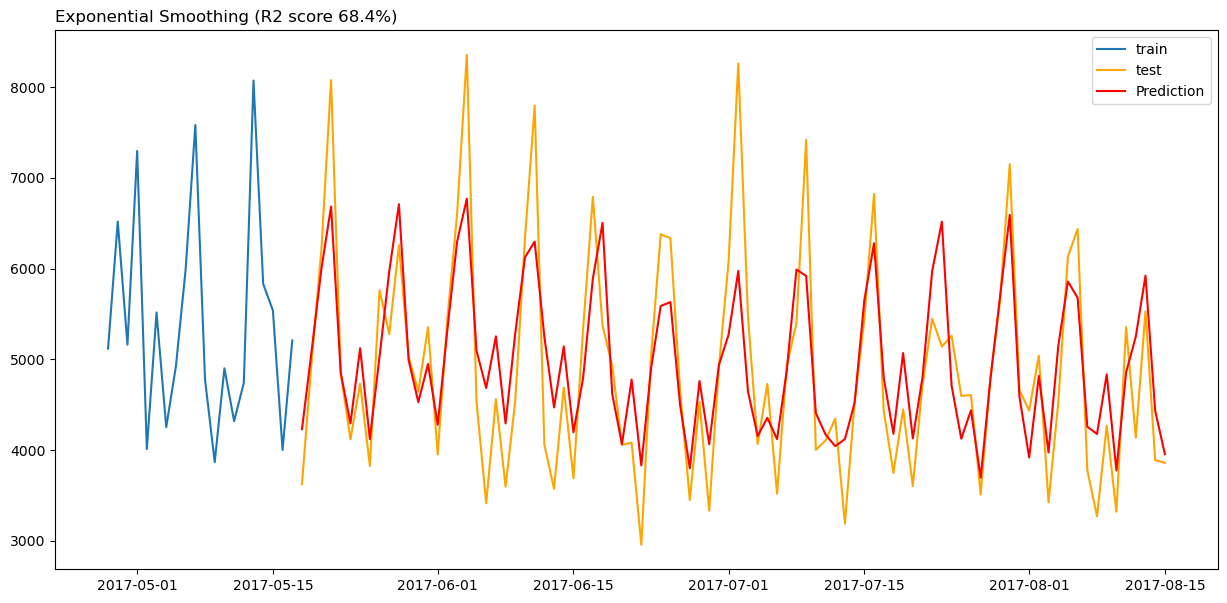

In [56]:
def objective_function(params):
    params={
        'endog': train,
        'seasonal_periods':int(params['seasonal_periods']),
        'trend': 'add',
#        'damped': 'True',
        'seasonal': 'add',
        'damped_trend': params['damped_trend'],
        'initialization_method': params['initialization_method'],
#        'initial_level': params['initial_level'],
#        'initial_trend': params['initial_trend'],
#        'use_boxcox': params['use_boxcox'],
#        'freq': params['freq'],
    }
    clf=ExponentialSmoothing(**params)
    clf_fit=clf.fit()
    pred = pd.DataFrame(clf_fit.forecast(steps=90),index=test.index)

    # score the model
    score = r2_score(y_true=test, y_pred=pred)
    return {'loss': -score, 'status': STATUS_OK, 'model': clf,'pred':pred, 'params':params}



# define the hyperparameter space
params = {
    'endog': train,
    'seasonal_periods': hp.quniform('seasonal_periods',7, 365,1),
    'trend': 'add',
    'damped_trend': hp.choice('damped_trend',['True','False']),
    'seasonal': 'add',
    'initialization_method': hp.choice('initialization_method',[None,'estimated','heuristic','legacy-heuristic']),
#    'initialization_method': hp.choice('initialization_method',[None,'estimated','heuristic','legacy-heuristic','known']),
#    'initial_level': hp.uniform('initial_level',0,10000),
#    'initial_trend': hp.uniform('initial_trend',0,10000),
#    'use_boxcox': hp.choice('use_boxcox',['True','False']),
#    'freq': hp.choice('freq',['B','D','W','M','A','Q']),
}

# tune the hyperparameters
trials = Trials()
best_hyperparams = fmin(fn=objective_function, 
                        space=params, 
                        algo=tpe.suggest, 
                        max_evals=200, 
                        trials=trials, 
                        rstate=np.random.default_rng(random.seed(123)))

# extract the best scores
print('R2-Value:', - trials.best_trial['result']['loss'])


# extract the best model
best_model = trials.best_trial['result']['model']
print(best_model)

dd=pd.DataFrame(trials.best_trial['result']['pred'], index=test.index)
R2_score = r2_score(test.sales, dd)*100
print('R2 score of Random forest regressor: %.1f' % R2_score, ' %')

plt.plot(train[-20:].sales, label='train')
plt.plot(test.sales, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('Exponential Smoothing (R2 score {}%)' .format(round(R2_score,1)), loc='left')

In [338]:
trials.best_trial['result']['params']

{'endog':              sales
 datetime          
 2013-01-02  3181.0
 2013-01-03  2192.0
 2013-01-04  2734.0
 2013-01-05  3361.0
 2013-01-06  3458.0
 ...            ...
 2017-05-13  8072.0
 2017-05-14  5831.0
 2017-05-15  5539.0
 2017-05-16  4001.0
 2017-05-17  5209.0
 
 [1597 rows x 1 columns],
 'seasonal_periods': 105,
 'trend': 'add',
 'damped': 'True',
 'seasonal': 'add'}

### KNN model

In [57]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier as knn
from sktime.datatypes import check_is_mtype
import numpy as np
model_knn=knn(n_neighbors = 31,
             weights = 'distance',
             algorithm = 'auto',
             distance = 'euclidean')


In [78]:

#model_knn_results = model_knn.fit(x_train,y_train)
#x=np.arange(1,1597,1)
#print(type(train.to_numpy()))

#dd=pd.DataFrame(model_knn_results.y_hat[:200])

In [ ]:
plt.plot(train[-200:], label='train')
plt.plot(test, color='orange', label='test')
plt.plot(dd, color='red', label='Predicted')
plt.legend(loc='best')
plt.title('KNN model', loc='left')
rmse = sqrt(mean_squared_error(test, dd))
print('Test RMSE: %.3f' % rmse)

### XGBRegressor

In [59]:
train_xgbr               = train
train_xgbr['dayofweek']  = train_xgbr.index.dayofweek
train_xgbr['dayofmonth'] = train_xgbr.index.day
train_xgbr['dayofyear']  = train_xgbr.index.dayofyear
train_xgbr['month']      = train_xgbr.index.month
train_xgbr['weekofyear'] = train_xgbr.index.weekofyear
train_xgbr['quarter']    = train_xgbr.index.quarter
train_xgbr['year']       = train_xgbr.index.year
x_train = train_xgbr.loc[:, train_xgbr.columns !='sales']
y_train = train_xgbr.sales
print(x_train)
print(y_train)

test_xgbr                = test
test_xgbr['dayofweek']   = test_xgbr.index.dayofweek
test_xgbr['dayofmonth']  = test_xgbr.index.day
test_xgbr['dayofyear']   = test_xgbr.index.dayofyear
test_xgbr['month']       = test_xgbr.index.month
test_xgbr['weekofyear']  = test_xgbr.index.weekofyear
test_xgbr['quarter']     = test_xgbr.index.quarter
test_xgbr['year']        = test_xgbr.index.year
x_test = test_xgbr.loc[:, test_xgbr.columns !='sales']
y_test = test_xgbr.sales

print(x_test)
print(y_test)

            dayofweek  dayofmonth  dayofyear  month  weekofyear  quarter  year
datetime                                                                      
2013-01-02          2           2          2      1           1        1  2013
2013-01-03          3           3          3      1           1        1  2013
2013-01-04          4           4          4      1           1        1  2013
2013-01-05          5           5          5      1           1        1  2013
2013-01-06          6           6          6      1           1        1  2013
...               ...         ...        ...    ...         ...      ...   ...
2017-05-13          5          13        133      5          19        2  2017
2017-05-14          6          14        134      5          19        2  2017
2017-05-15          0          15        135      5          20        2  2017
2017-05-16          1          16        136      5          20        2  2017
2017-05-17          2          17        137      5 

In [61]:
from xgboost import XGBRegressor as xgbr

model_xgbr = xgbr(objective='reg:squarederror', 
                  booster='dart', 
                  n_estimators=100, 
                  learning_rate=0.3,
                  max_depth=20, 
                  subsample=0.8, 
                  colsample_bytree=0.8, 
                  nthread=4, 
                  scale_pos_weight=1, 
                  gamma=0.1)


model_xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

Test RMSE: 620.889
R2 score of XGB regressor: 73.4  %


Text(0.0, 1.0, 'XGB Regression (R2 score 73.41%)')

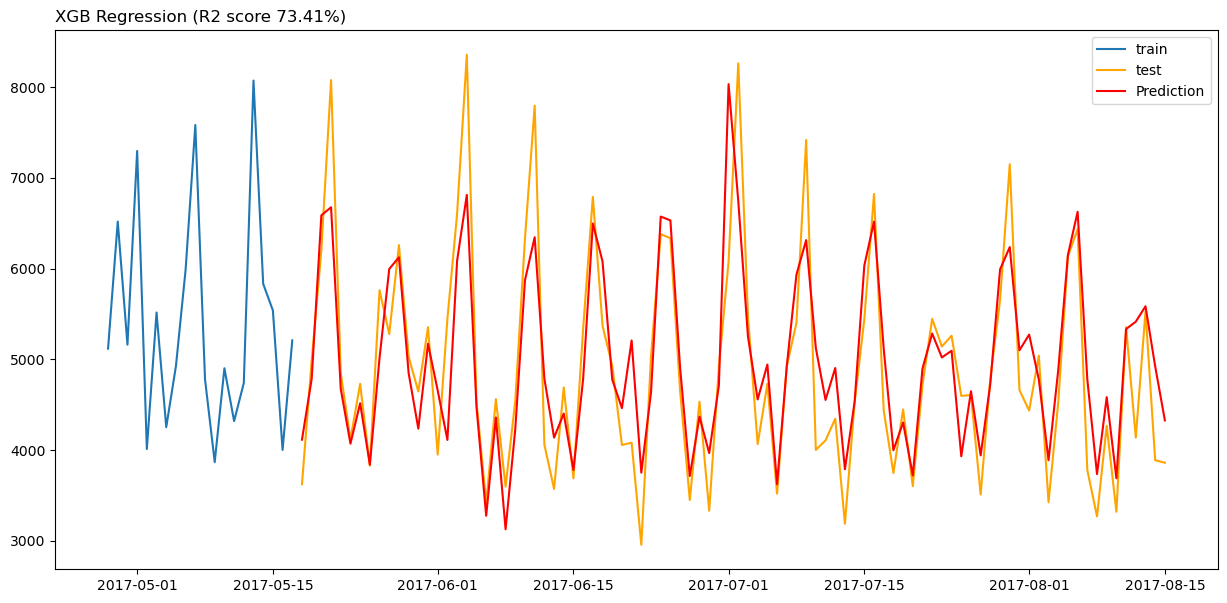

In [62]:
y=model_xgbr.predict(x_test)
dd=pd.DataFrame(y,index=test_xgbr.index)

rmse = sqrt(mean_squared_error(y_test.values, dd.values))
print('Test RMSE: %.3f' % rmse)
R2_score = r2_score(y_test.values, dd.values)*100
print('R2 score of XGB regressor: %.1f' % R2_score, ' %')

plt.plot(train_xgbr[-20:].sales, label='train')
plt.plot(test_xgbr.sales, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('XGB Regression (R2 score {}%)' .format(round(R2_score,2)), loc='left')

#### Bayesian optimization using Hyperopt

In [71]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import random

X_train=x_train.to_numpy()
Y_train=y_train.to_numpy()
X_test=x_test.to_numpy()
Y_test=y_test.to_numpy()

# define the model
def XGBModel(params):
    
    return xgb.XGBRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        booster=params['booster'],
        #objective=params['objective'],
        objective='reg:linear',
        #objective='reg:squarederror',
        gamma=params['gamma'],
        max_depth=int(params['max_depth']),
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=params['min_child_weight'],
        random_state=1, # fix the random seed
        n_jobs=4,
        nthread=4,
        num_parallel_tree=int(params['num_parallel_tree']),
        max_delta_step=int(params['max_delta_step']),
        subsample=params['subsample'],
        predictor='auto',
        max_leaves=0, 
        max_bin=256, 
        max_cat_to_onehot=4,
        gpu_id=-1,
        early_stopping_rounds=None, 
        enable_categorical=False,
        colsample_bylevel=1, 
        colsample_bynode=1,
        callbacks=None,
        importance_type=None,
        grow_policy='depthwise'
    )

# define the objective function
def obj(params):

    # fit the model
    xgb_model = XGBModel(params)
    xgb_model.fit(X_train, Y_train)
    pred = xgb_model.predict(X_test)

    # score the model
    r2_value = r2_score(y_true=Y_test, y_pred=pred)
    mape = mean_absolute_percentage_error(y_true=Y_test, y_pred=pred)

    return {'loss': - r2_value, 'mape': mape, 'status': STATUS_OK, 'model': xgb_model, 'pred': pred, 'param': params}

# define the hyperparameter space
params = {
    'n_estimators': hp.quniform('n_estimators',10, 500,1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'booster': hp.choice('booster', ['gbtree', 'dart','gblinear']),
    #'objective': hp.choice('objective', ['reg:squarederror','reg:squaredlogerror','reg:pseudohubererror','reg:linear']),
    #'reg_lambda': hp.uniform('reg_lambda', 0, 10),
    #'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.9),
    'gamma': hp.uniform('gamma', 0.1, 0.9),
    'max_depth': hp.quniform('max_depth', 3, 40, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 100, 1),
    'max_delta_step': hp.quniform('max_delta_step',0, 10, 1),
    'subsample': hp.uniform('subsample', 0, 1),
    #'n_jobs': hp.quniform('n_jobs',1,10,1),
    #'nthread': hp.quniform('nthread',1,10,1),
    'num_parallel_tree':hp.uniform('num_parallel_tree',1,100),
}



# tune the hyperparameters
trials = Trials()
best_hyperparams = fmin(fn=obj, space=params, algo=tpe.suggest, max_evals=100, trials=trials, 
                        rstate=np.random.default_rng(random.seed(3)))

# extract the best scores
print('R2-Value:', - trials.best_trial['result']['loss'])
print('MAPE Value :', trials.best_trial['result']['mape'])

[09:58:28] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:02:29] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:02:29] WARNING: D:\bld\xgboost-split_1662013972589\work\src\learner.cc:627:                                        
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "num_parallel_tree", "predictor", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:02:29] WARNING: D:\bld\xgboost-s

[10:05:31] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:07:16] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:07:16] WARNING: D:\bld\xgboost-split_1662013972589\work\src\learner.cc:627:                                        
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "num_parallel_tree", "predictor", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:07:17] WARNING: D:\bld\xgboost-s

[10:18:52] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:53] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:19:01] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:20:17] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:20:17] WARNING: D:\bld\xgboost-split_1662013972589\work\src\learner.cc:627:                                        
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "num_parallel_tree", "predictor", "subsample" } might not be

[11:01:14] WARNING: D:\bld\xgboost-split_1662013972589\work\src\learner.cc:627:                                        
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "num_parallel_tree", "predictor", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:01:14] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:20] WARNING: D:\bld\xgboost-split_1662013972589\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:21] WARNING: D:\bld\xgboost-s

Test RMSE: 599.363
R2 score of XGB regressor: 75.2  %


Text(0.0, 1.0, 'XGB Regression (R2 score 75.2 %)')

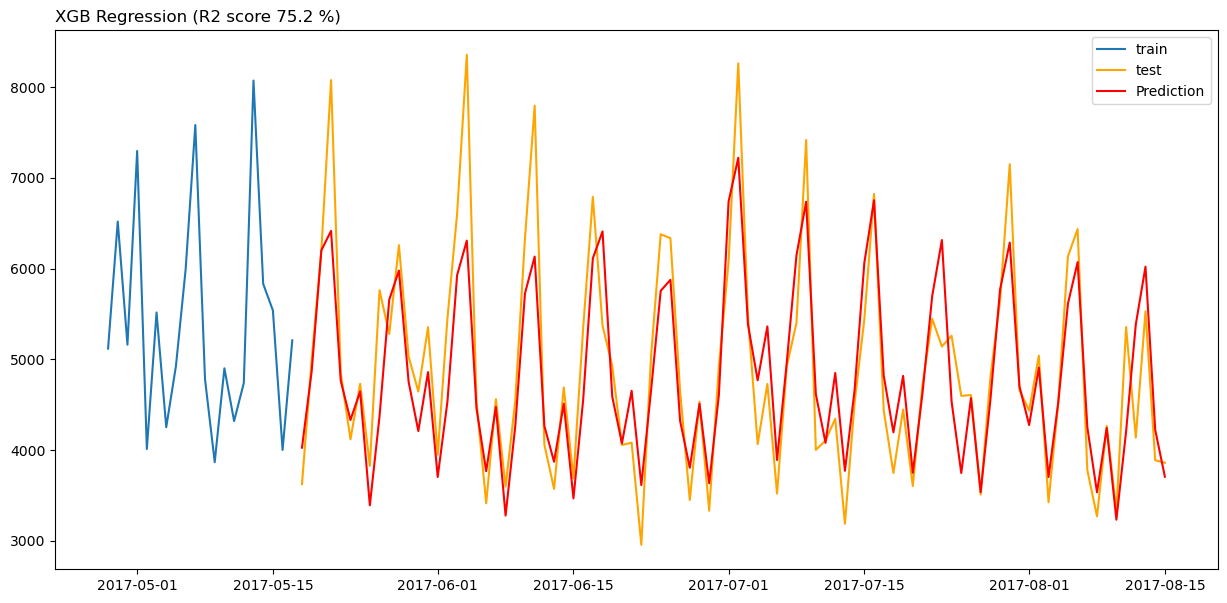

In [72]:
dd=pd.DataFrame(trials.best_trial['result']['pred'], index=test.index)
rmse = sqrt(mean_squared_error(Y_test, dd))
print('Test RMSE: %.3f' % rmse)
R2_score = r2_score(Y_test, dd)*100
print('R2 score of XGB regressor: %.1f' % R2_score, ' %')

plt.plot(train_xgbr[-20:].sales, label='train')
plt.plot(test_xgbr.sales, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('XGB Regression (R2 score {} %)' .format(round(R2_score,1)), loc='left')

In [73]:
model_xgbr

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

### Light GBM

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
Test RMSE: 617.377
R2 score of XGB regressor: 73.7  %


Text(0.0, 1.0, 'LGBM Regression (R2 score 73.71%)')

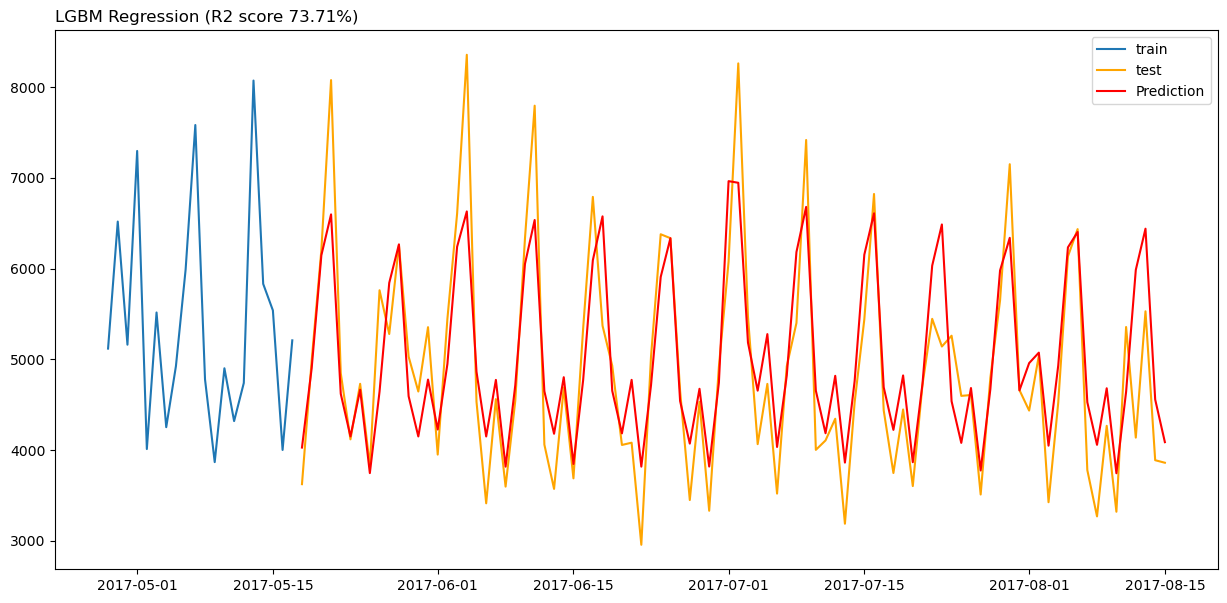

In [74]:
import lightgbm as lgbm
LGBM_model=lgbm.LGBMRegressor(objective='regression',#regression, regression_l1, huber, fair, poisson, quantile, mape, gamma, tweedie
                              boosting='gbdt',#gbdt,rf,dart,goss
                              n_iter=100,
                              learning_rate =0.1,
                              max_depth=10,
                              num_leaves=10,
                              tree_type='serial',#serial,feature,data,voting
                              n_jobs=-1,
                              feature_fraction=1,
                              seed=123
)
LGBM_model.fit(x_train, y_train)
dd=pd.DataFrame(LGBM_model.predict(x_test), index=test.index)

rmse = sqrt(mean_squared_error(Y_test, dd))
print('Test RMSE: %.3f' % rmse)
R2_score = r2_score(Y_test, dd)*100
print('R2 score of XGB regressor: %.1f' % R2_score, ' %')

plt.plot(train_xgbr[-20:].sales, label='train')
plt.plot(test_xgbr.sales, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('LGBM Regression (R2 score {}%)' .format(round(R2_score,2)), loc='left')

#### Bayesian optimization with hyperopt

In [75]:

#Function definition
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
import lightgbm as lgb
def objective_function(params):
    params={
        'num_leaves': int(params['num_leaves']),
        'n_iter': int(params['n_iter']),
        'max_depth': int(params['max_depth']),
        'learning_rate': params['learning_rate'],
        'colsample_bytree': params['colsample_bytree'],
        'boosting': params['boosting'],
        'objective': params['objective'],
    }
    clf=lgb.LGBMRegressor(**params)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)

    # score the model
    score = r2_score(y_true=Y_test, y_pred=pred)
    return {'loss': -score, 'status': STATUS_OK, 'model': clf,'pred':pred, 'param':params}



#Domain space
from hyperopt import hp
space ={
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': hp.quniform('max_depth', 3, 200, 1),
    'n_iter': hp.quniform("n_estimators", 3, 1000, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 100, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'objective': hp.choice("objective",['regression','regression_l1','huber','fair']),
#    'objective': hp.choice("objective",['regression','regression_l1','huber','fair','poisson','quantile','mape','gamma','tweedie']),
    'boosting': hp.choice('boosting', ['gbdt','dart','goss']),
#    'boosting': hp.choice('boosting', ['gbdt','rf','dart','goss']),
}

"""
LGBMRegressor(boosting='goss', feature_fraction=1, max_depth=10, n_iter=100,
              num_leaves=30, objective='regression', seed=123,
              tree_type='serial')
"""

#Optimization algorithm
from hyperopt import tpe
tpe_algorithm =tpe.suggest


#Results history
from hyperopt import Trials
trials=Trials()


from hyperopt import fmin
import numpy as np
import random
num_evals=200

trials=Trials()
best_param = fmin(objective_function, space, algo=tpe.suggest, max_evals=num_evals,
                 trials=trials, rstate=np.random.default_rng(random.seed(123)))

print('R2-Value:', - trials.best_trial['result']['loss'])

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart            
[LightGBM] [Warning] num_iterations is set=873, n_iter=873 will be ignored. Current value: num_iterations=873          
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt            
[LightGBM] [Warning] num_iterations is set=903, n_iter=903 will be ignored. Current value: num_iterations=903          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=522, n_iter=522 will be ignored. Current value: num_iterations=522          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=637, n_iter=637 will be ignored. Current value: num_iterations=637          
[LightGBM] [Warning] boosting is set=gos

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt            
[LightGBM] [Warning] num_iterations is set=812, n_iter=812 will be ignored. Current value: num_iterations=812          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=719, n_iter=719 will be ignored. Current value: num_iterations=719          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=744, n_iter=744 will be ignored. Current value: num_iterations=744          
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt            
[LightGBM] [Warning] num_iterations is set=424, n_iter=424 will be ignored. Current value: num_iterations=424          
[LightGBM] [Warning] boosting is set=dar

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=864, n_iter=864 will be ignored. Current value: num_iterations=864          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=644, n_iter=644 will be ignored. Current value: num_iterations=644          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=780, n_iter=780 will be ignored. Current value: num_iterations=780          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=696, n_iter=696 will be ignored. Current value: num_iterations=696          
[LightGBM] [Warning] boosting is set=gos

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=971, n_iter=971 will be ignored. Current value: num_iterations=971          
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt            
[LightGBM] [Warning] num_iterations is set=935, n_iter=935 will be ignored. Current value: num_iterations=935          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=779, n_iter=779 will be ignored. Current value: num_iterations=779          
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt            
[LightGBM] [Warning] num_iterations is set=319, n_iter=319 will be ignored. Current value: num_iterations=319          
[LightGBM] [Warning] boosting is set=gos

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt            
[LightGBM] [Warning] num_iterations is set=517, n_iter=517 will be ignored. Current value: num_iterations=517          
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart            
[LightGBM] [Warning] num_iterations is set=57, n_iter=57 will be ignored. Current value: num_iterations=57             
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=699, n_iter=699 will be ignored. Current value: num_iterations=699          
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt            
[LightGBM] [Warning] num_iterations is set=579, n_iter=579 will be ignored. Current value: num_iterations=579          
[LightGBM] [Warning] boosting is set=gos

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=948, n_iter=948 will be ignored. Current value: num_iterations=948          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=718, n_iter=718 will be ignored. Current value: num_iterations=718          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=749, n_iter=749 will be ignored. Current value: num_iterations=749          
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss            
[LightGBM] [Warning] num_iterations is set=820, n_iter=820 will be ignored. Current value: num_iterations=820          
[LightGBM] [Warning] boosting is set=gos

LGBMRegressor(boosting='goss', colsample_bytree=0.7956276936929915,
              learning_rate=0.49822160092075374, max_depth=176, n_iter=719,
              num_leaves=76, objective='regression_l1')
{'num_leaves': 76, 'n_iter': 719, 'max_depth': 176, 'learning_rate': 0.49822160092075374, 'colsample_bytree': 0.7956276936929915, 'boosting': 'goss', 'objective': 'regression_l1'}
Test RMSE: 493.306
R2 score of LightGBM regressor: 83.2  %


Text(0.0, 1.0, 'LightGBM Regression (R2 score 83.2%)')

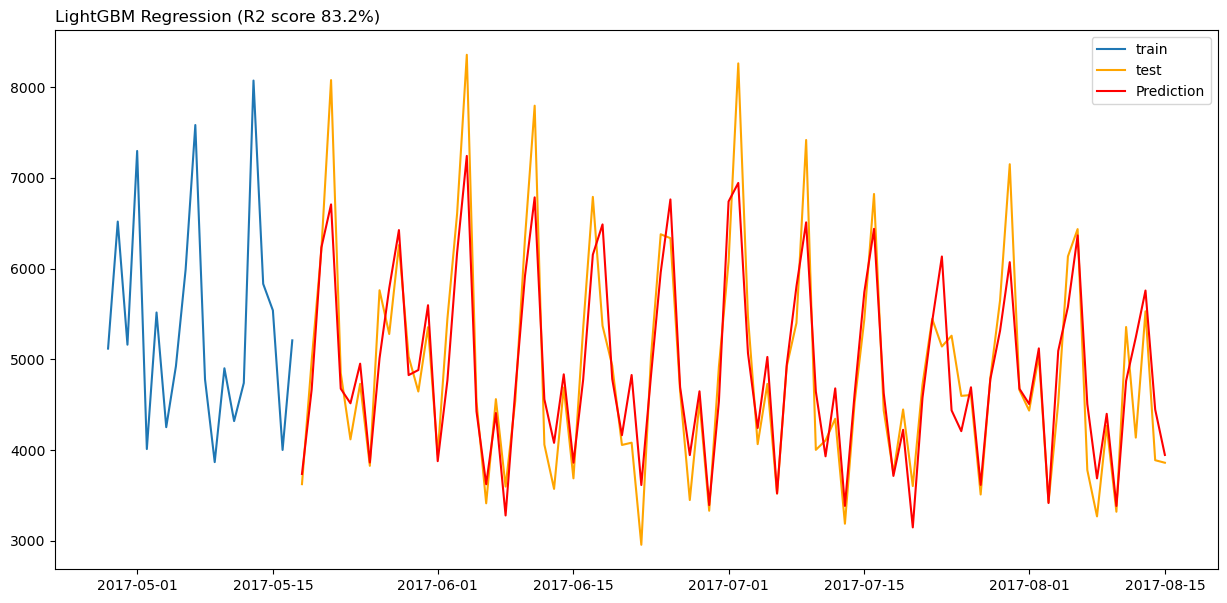

In [76]:
best_model = trials.best_trial['result']['model']
print(best_model)
print(trials.best_trial['result']['param'])

dd=pd.DataFrame(trials.best_trial['result']['pred'],index=test.index)
rmse = sqrt(mean_squared_error(Y_test, dd))
print('Test RMSE: %.3f' % rmse)
R2_score = r2_score(Y_test, dd)*100
print('R2 score of LightGBM regressor: %.1f' % R2_score, ' %')

plt.plot(train_xgbr[-20:].sales, label='train')
plt.plot(test_xgbr.sales, color='orange', label='test')
plt.plot(dd, color='red', label='Prediction')
plt.legend(loc='best')
plt.title('LightGBM Regression (R2 score {}%)' .format(round(R2_score,1)), loc='left')

### Support Vector Regression with tslearn

In [77]:
from tslearn.svm import TimeSeriesSVR
clf = TimeSeriesSVR(C=1.0, kernel='gak')
#clf.fit(train.index,train.sales)